## Importing necessary libraries

### 1 Claim Severity Prediction (Risk Model): 
For policies that have a claim, build a model to predict the TotalClaims amount. This model estimates the financial liability associated with a policy.

**Target Variable:** `TotalClaims` (on the subset of data where claims > 0).

**Evaluation Metric:** ``Root Mean Squared Error (RMSE)` to penalize large prediction errors, and R-squared.


In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
data = pd.read_csv("../data/data.csv")
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Missing Value

In [203]:
# Calculate the number of missing values per feature
missing_features = data.isnull().sum()[data.isnull().sum() > 0]
print(missing_features)
# Calculate the percentage of missing values per feature
missing_percentage = (missing_features / len(data)) * 100

# Create a DataFrame summarizing missing data
missing_df = pd.DataFrame({
    'missing_count': missing_features,
    'missing_percentage': missing_percentage
})

# Optional: Display the DataFrame sorted by missing percentage (descending)
missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)

print(missing_df)

Citizenship                 895210
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64
                         missing_count  missing_percentage
NumberOfVehiclesInFleet        1000098          100.000000
CrossBorder                     999400           99.930207
Citiz

In [204]:
missing_df.head()

,missing_count,missing_percentage
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
Citizenship,895210,89.512228
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810


### Missing Data Summary 

This table provides an overview of features in the dataset with missing values, including the count and percentage of missing data points for each feature.

| Feature                   | Missing Count | Missing Percentage (%) |
|---------------------------|--------------:|----------------------:|
| NumberOfVehiclesInFleet   |     1,000,098 |              100.00   |
| CrossBorder               |       999,400 |               99.93   |
| Citizenship               |       895,210 |               89.51   |
| CustomValueEstimate       |       779,642 |               77.96   |
| Rebuilt                   |       641,901 |               64.18   |
| WrittenOff                |       641,901 |               64.18   |
| Converted                 |       641,901 |               64.18   |
| NewVehicle                |       153,295 |               15.33   |
| Bank                      |       145,961 |               14.59   |
| AccountType               |        40,232 |                4.02   |
| Gender                    |         9,536 |                0.95   |
| MaritalStatus             |         8,259 |                0.83   |
| make                      |           552 |                0.06   |
| mmcode                    |           552 |                0.06   |
| VehicleType               |           552 |                0.06   |
| Cylinders                 |           552 |                0.06   |
| bodytype                  |           552 |                0.06   |
| kilowatts                 |           552 |                0.06   |
| NumberOfDoors             |           552 |                0.06   |
| VehicleIntroDate          |           552 |                0.06   |
| cubiccapacity             |           552 |                0.06   |
| Model                     |           552 |                0.06   |
| CapitalOutstanding        |             2 |                0.00   |

#### Interpretation

- **High Missingness:**  
  Features such as `NumberOfVehiclesInFleet`, `CrossBorder`, `Citizenship`, and `CustomValueEstimate` have extremely high missing rates (over 75%), which may impact their usefulness for analysis or modeling. Consider dropping or imputing these features based on business needs and data relevance.

- **Moderate to Low Missingness:**  
  Features like `NewVehicle`, `Bank`, and `AccountType` have moderate missingness (4–15%). Imputation or targeted data collection may be appropriate.

- **Minimal Missingness:**  
  Features such as `Gender`, `MaritalStatus`, and several vehicle attributes have very low missing rates (<1%). These can typically be imputed with minimal impact on data quality.

- **Action:**  
  Review features with high missingness for potential exclusion. For features with low or moderate missingness, consider appropriate imputation strategies to preserve data integrity.

---

**Note:**  
Understanding the extent and pattern of missing data is crucial for effective data cleaning, feature engineering, and ensuring robust model performance.

**Description:**  
This code identifies all features (columns) in your dataset with more than 50% missing data and removes them from the DataFrame.

- `missing_value_features = missing_df[missing_df['missing_percentage'] > 50].index.to_list()`:  
  Creates a list of feature names where the percentage of missing values exceeds 50%.

- `data = data.drop(columns=missing_value_features)`:  
  Drops these features from the data DataFrame, resulting in a cleaner dataset with fewer missing values.

**Purpose:**  
To improve data quality by removing columns that are mostly incomplete and unlikely to provide useful information for analysis or modeling.

In [205]:
categorical_features = data.select_dtypes(include="object").columns.to_list()
numerical_features = data.select_dtypes(include="number").columns.to_list()
boolean_features = data.select_dtypes(include="bool").columns.to_list()

print(f"Identified {len(categorical_features)} categorical features: {categorical_features}")
print(f"Identified {len(numerical_features)} numerical features: {numerical_features}")
print(f"Identified {len(boolean_features)} numerical features: {boolean_features}")

Identified 34 categorical features: ['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']
Identified 15 numerical features: ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
Identified 3 numerical features: ['IsVATRegistered', 'AlarmImmobiliser', 'TrackingDevice']


In [206]:
filling_need_cat_features = [col for col in missing_features.index if col in data.select_dtypes(include="object").columns]
filling_need_num_features = [col for col in missing_features.index if col in data.select_dtypes(include="number").columns]
filling_need_bool_features = [col for col in missing_features.index if col in data.select_dtypes(include="bool").columns]


data[filling_need_cat_features].isna().sum() / len(data) * 100

Citizenship           89.512228
Bank                  14.594670
AccountType            4.022806
MaritalStatus          0.825819
Gender                 0.953507
VehicleType            0.055195
make                   0.055195
Model                  0.055195
bodytype               0.055195
VehicleIntroDate       0.055195
CapitalOutstanding     0.000200
NewVehicle            15.327998
WrittenOff            64.183810
Rebuilt               64.183810
Converted             64.183810
CrossBorder           99.930207
dtype: float64

In [207]:
data[filling_need_num_features].isna().sum() / len(data) * 100

mmcode                       0.055195
Cylinders                    0.055195
cubiccapacity                0.055195
kilowatts                    0.055195
NumberOfDoors                0.055195
CustomValueEstimate         77.956560
NumberOfVehiclesInFleet    100.000000
dtype: float64

In [208]:
data[filling_need_bool_features].isna().sum() / len(data) * 100

Series([], dtype: float64)

### **Fill missing values**

* numerical features with mean value
* Categorical features with mode value

In [209]:
# Fill missing values in numerical features with the mean
for col in filling_need_num_features:
    data[col] = data[col].fillna(data[col].mean())

# Fill missing values in categorical features with the mode
for col in filling_need_cat_features:
    mode_val = data[col].mode()[0]
    data[col] = data[col].fillna(mode_val)

In [210]:
data.isna().sum().sum()

np.int64(1000098)

In [211]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,ZA,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,ZA,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,ZA,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,ZA,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,ZA,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## **Filter the data claim > 0**

In [212]:
mask = data.TotalClaims > 0

claims_data = data[mask]

claims_data.shape

(2788, 52)

In [213]:
claims_data["CapitalOutstanding"].value_counts()

CapitalOutstanding
0           1977
0            360
232500        17
282100        11
345800        11
            ... 
289418.0       1
269900.0       1
285100.0       1
152000.0       1
174000         1
Name: count, Length: 222, dtype: int64

In [214]:
claims_data["VehicleIntroDate"] = pd.to_datetime(claims_data.VehicleIntroDate)
claims_data["TransactionMonth"] = pd.to_datetime(claims_data.TransactionMonth)

In [215]:
claims_data["CapitalOutstanding"] = claims_data["CapitalOutstanding"].astype(float)

In [216]:
claims_data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
203,46222,4044,2014-10-01,True,ZA,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,2294.096491
284,82062,7174,2015-03-01,True,ZA,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,2040.473684
1560,119591,8672,2015-04-01,True,ZA,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1213.889211,46492.211754
1779,50193,283,2014-10-01,True,ZA,Close Corporation,Mr,English,Standard Bank,Current account,...,Mobility - Taxi with value more than R100 000 ...,Own Damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,645.017456,26516.859649
1943,119582,8672,2015-04-01,True,ZA,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Income Protector,Income Protector,Income Protector,Optional Extended Covers,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,74.561404,6140.350877


### **Categorical Features**

In [217]:
import warnings

warnings.filterwarnings('ignore')
for col in claims_data.select_dtypes(include="object").columns:
    if claims_data[col].nunique() == 1:
        claims_data.drop(columns=[col], inplace=True)
        
claims_data.shape

(2788, 41)

In [218]:
categorical_features = claims_data.select_dtypes(include="object").columns.to_list()
categorical_features

['Citizenship',
 'LegalType',
 'Title',
 'Bank',
 'AccountType',
 'MaritalStatus',
 'Gender',
 'Province',
 'MainCrestaZone',
 'SubCrestaZone',
 'VehicleType',
 'make',
 'Model',
 'bodytype',
 'ExcessSelected',
 'CoverCategory',
 'CoverType',
 'CoverGroup',
 'Section',
 'Product']

In [219]:
claims_data.Title.value_counts()

Title
Mr      2656
Mrs       88
Ms        23
Miss      19
Dr         2
Name: count, dtype: int64

In [220]:
grouped_by_month = claims_data.groupby("Title")["TotalClaims"].mean()
grouped_by_month

Title
Dr      39676.491228
Miss    14021.640065
Mr      23269.461881
Mrs     23329.536340
Ms      29728.218917
Name: TotalClaims, dtype: float64

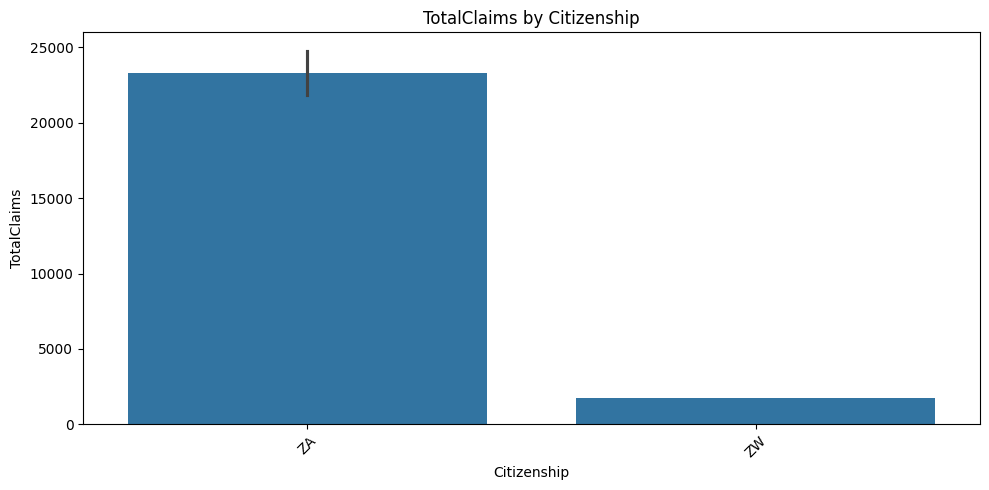

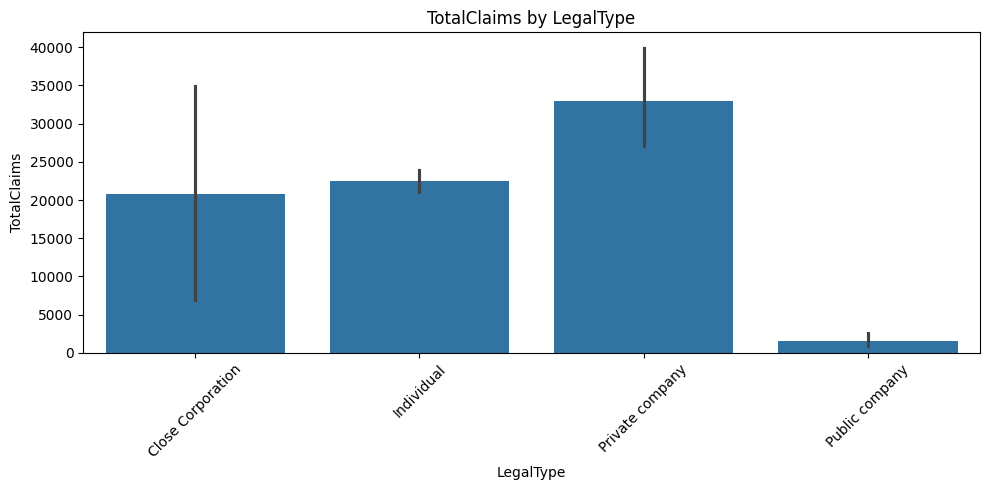

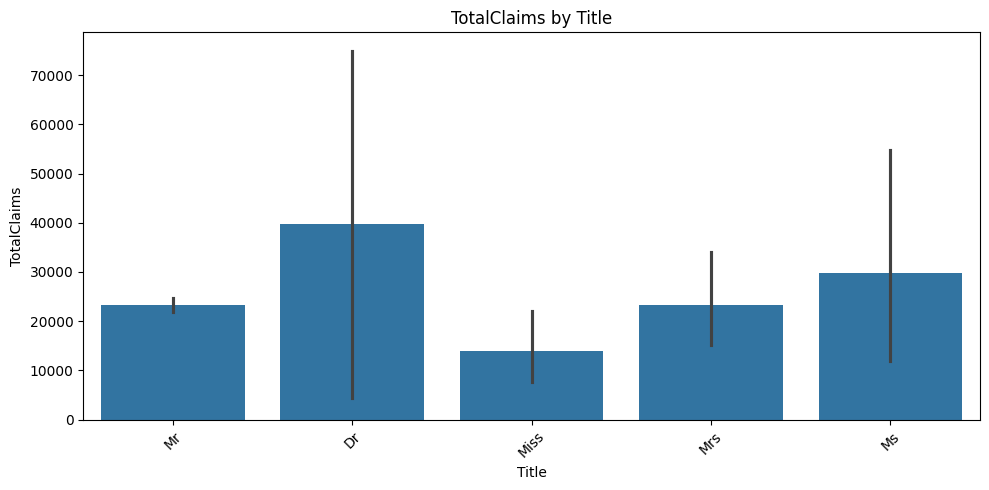

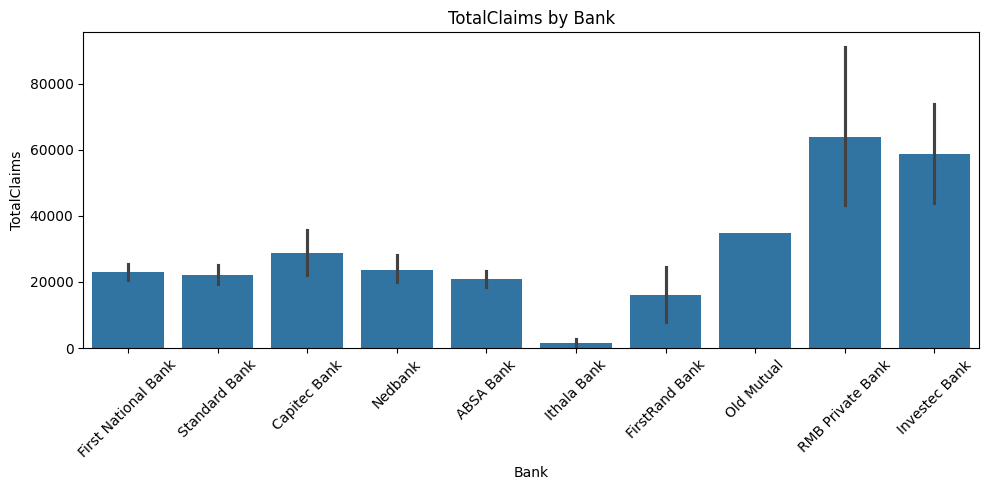

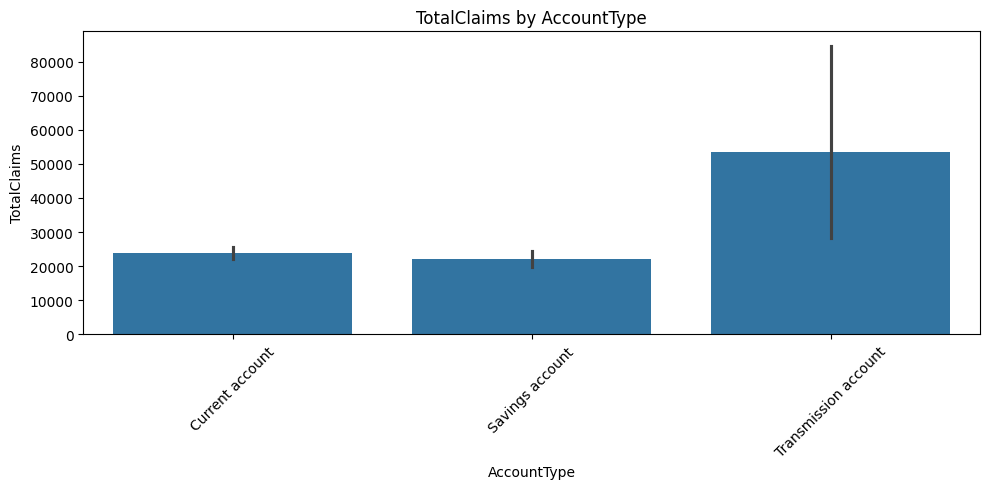

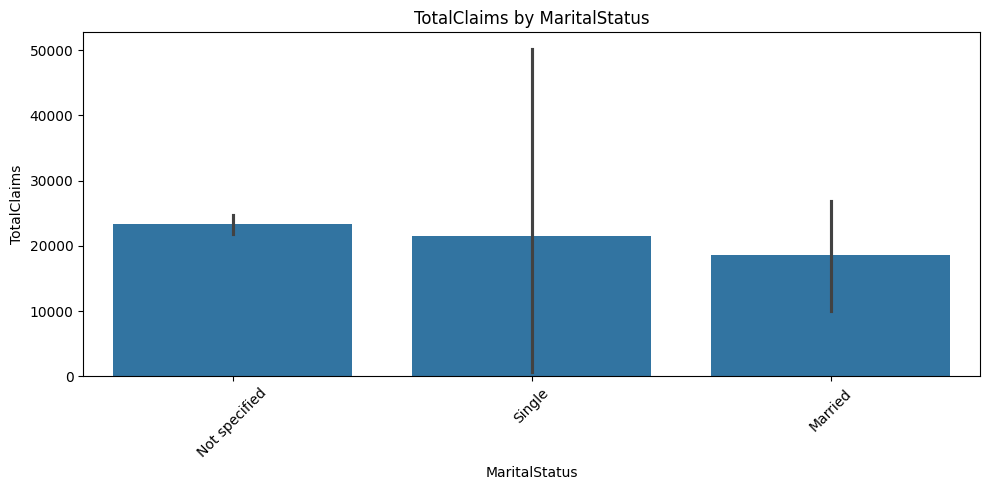

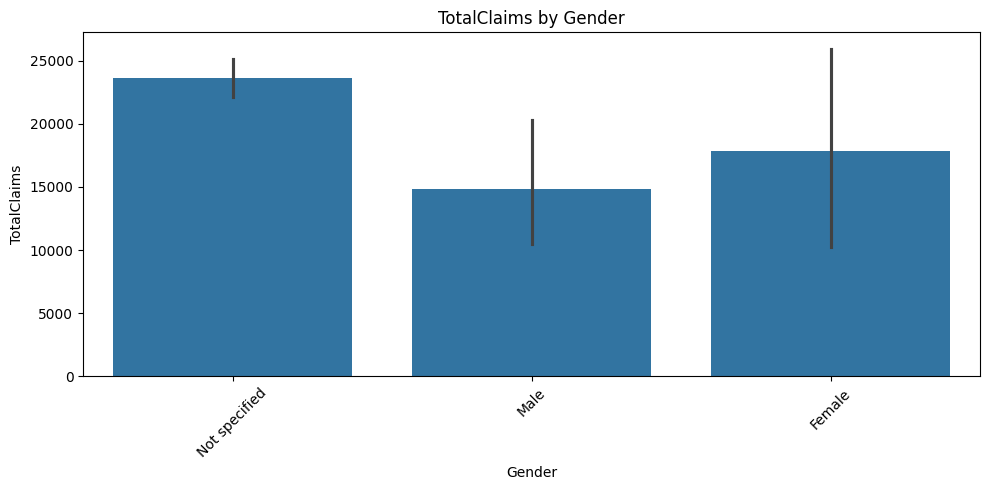

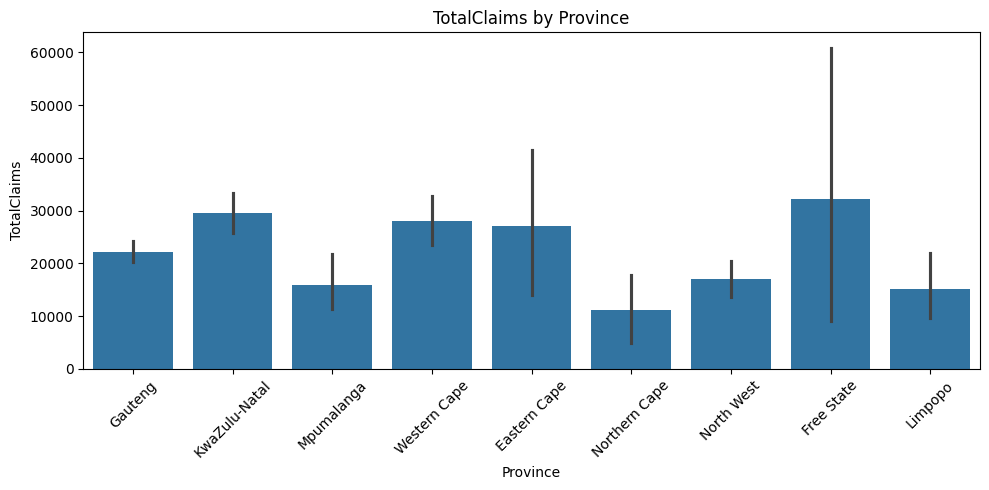

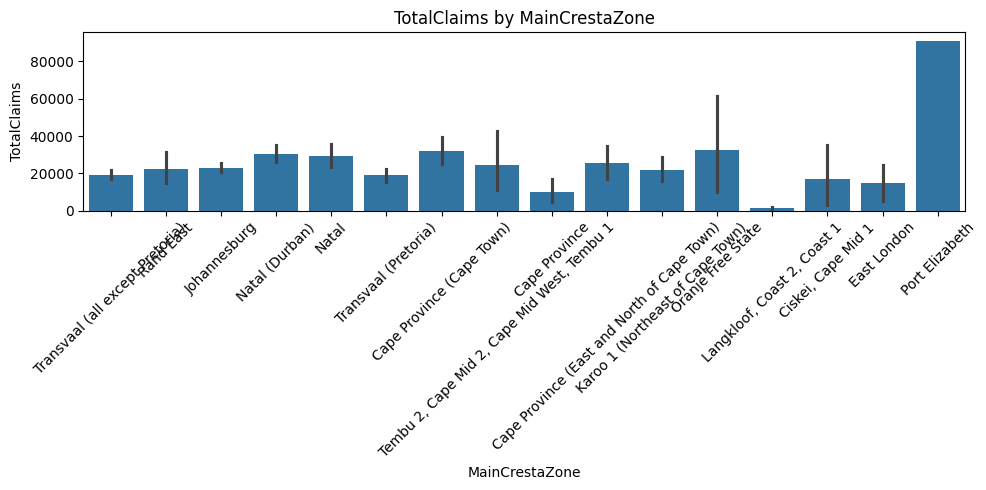

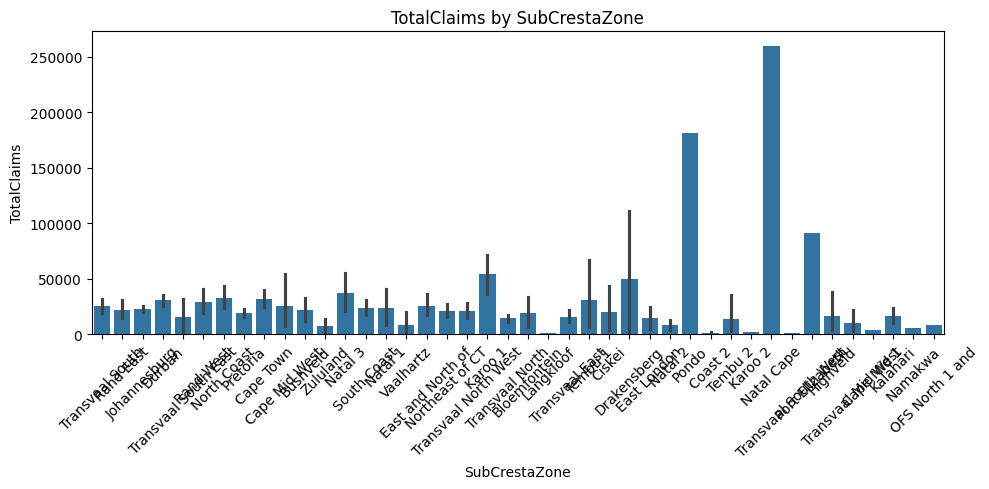

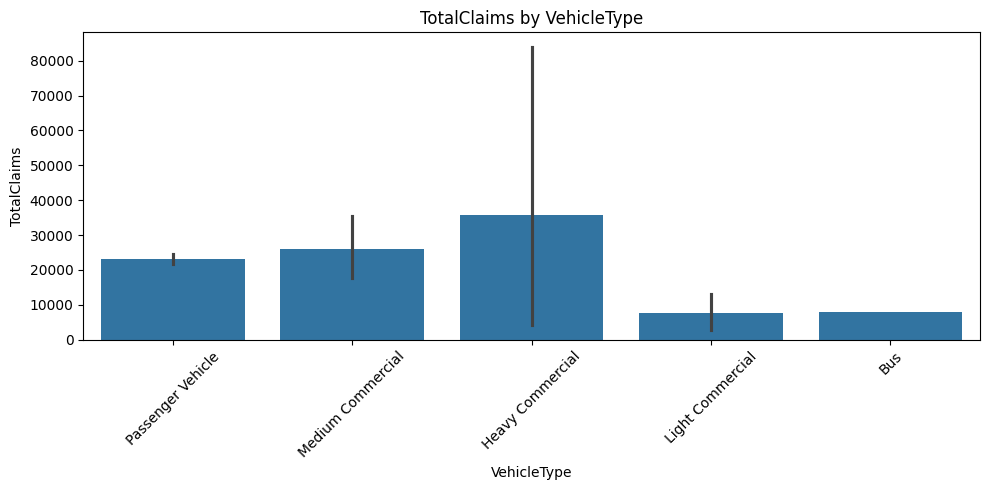

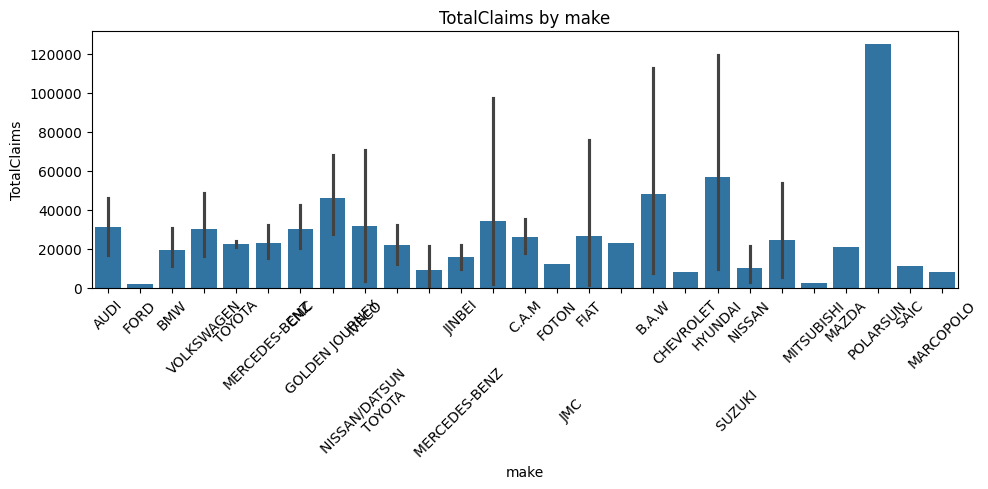

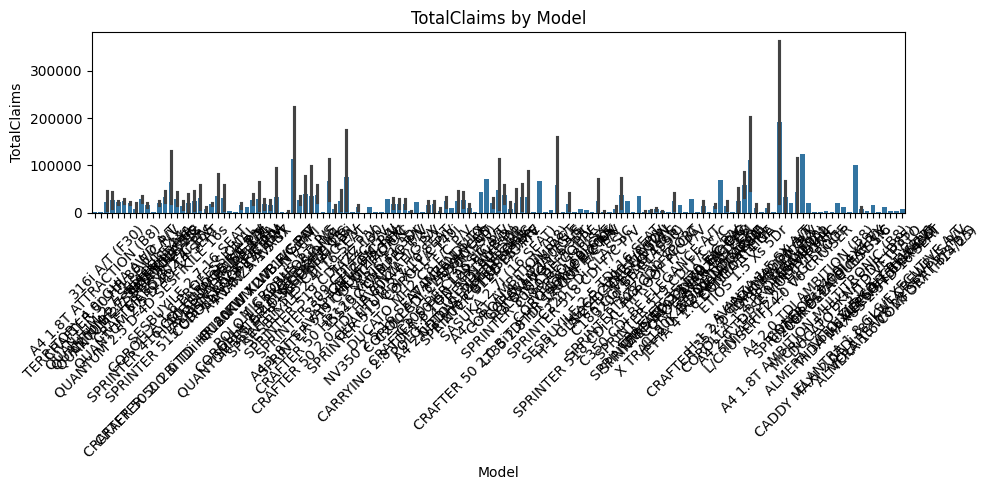

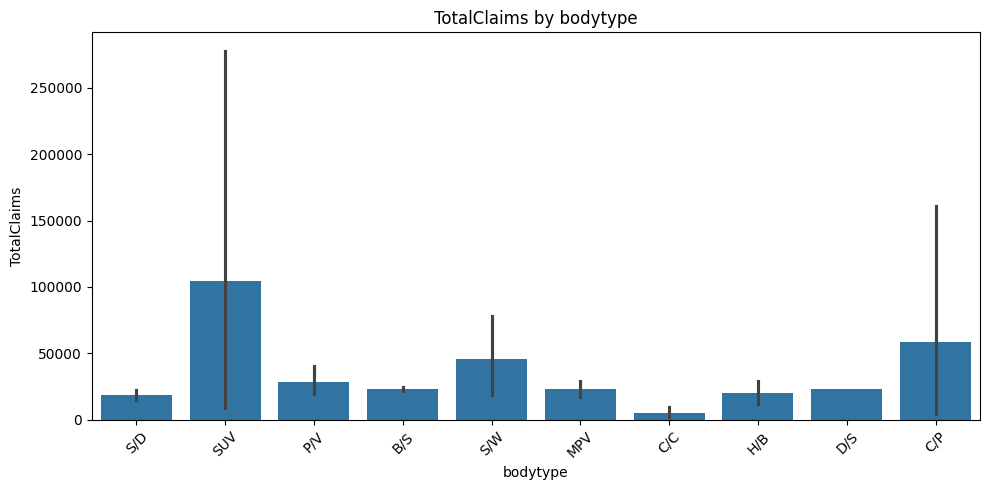

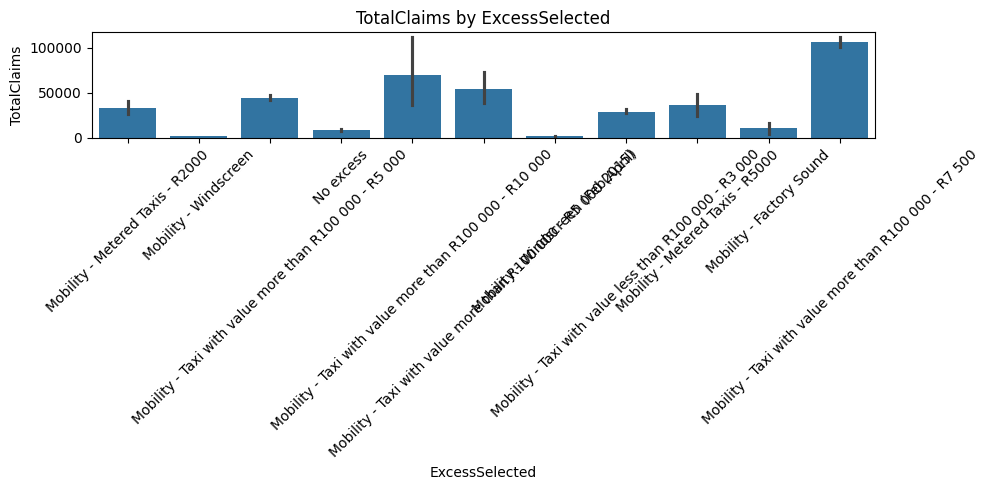

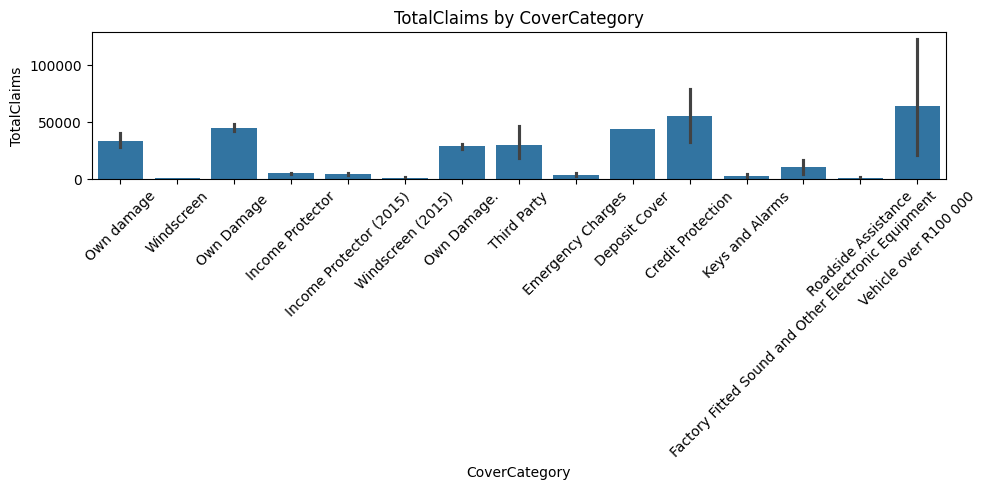

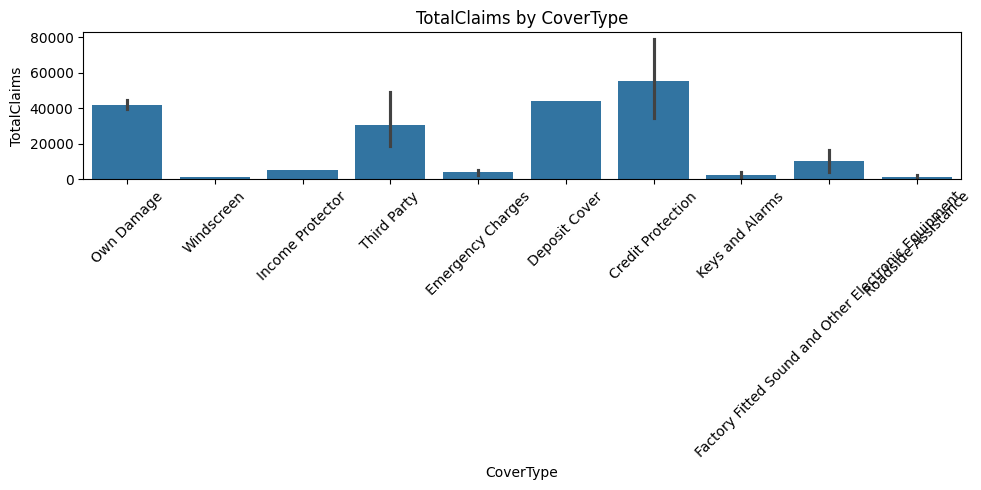

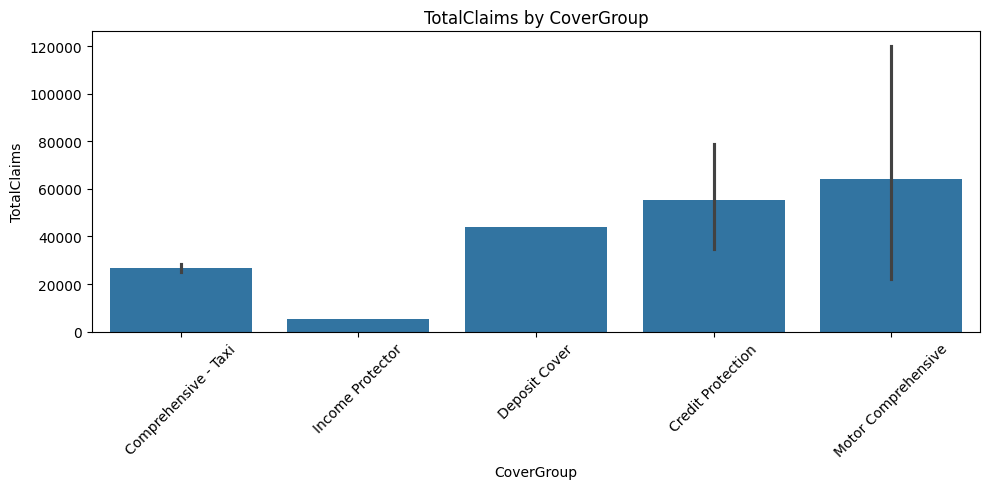

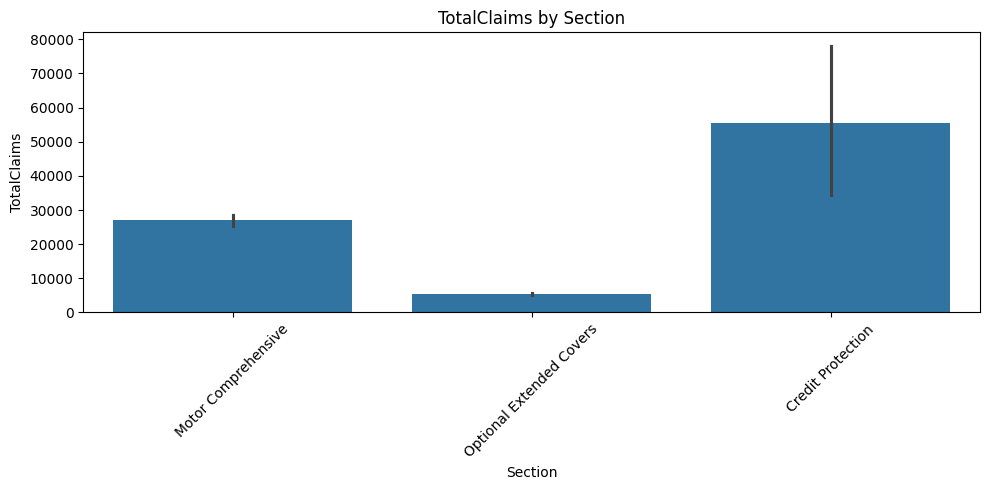

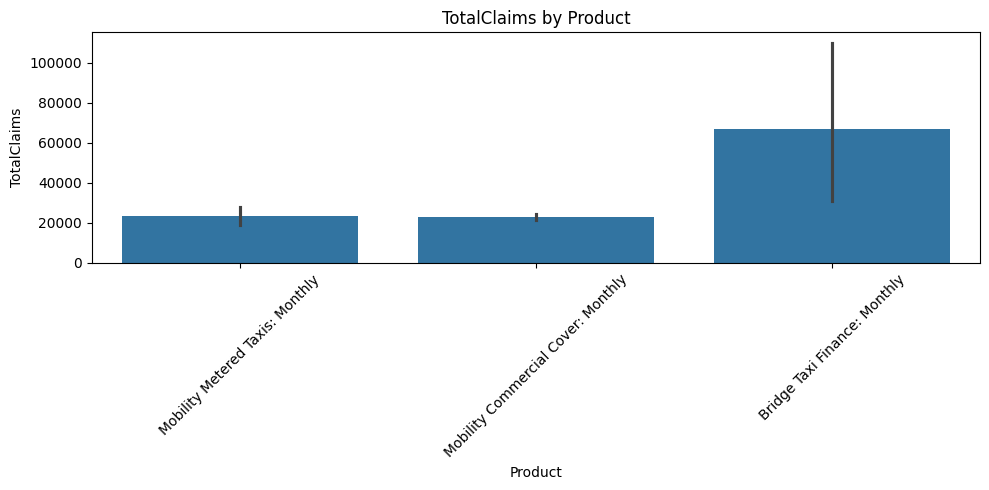

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot barplots of TotalClaims for each categorical feature
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=claims_data, 
        x=col, 
        y="TotalClaims"
    )
    plt.title(f"TotalClaims by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Distribution Check

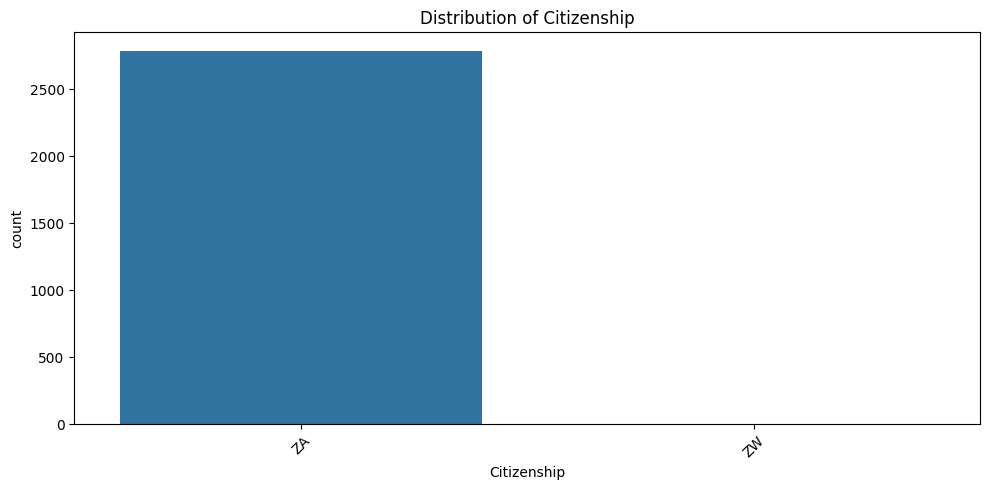

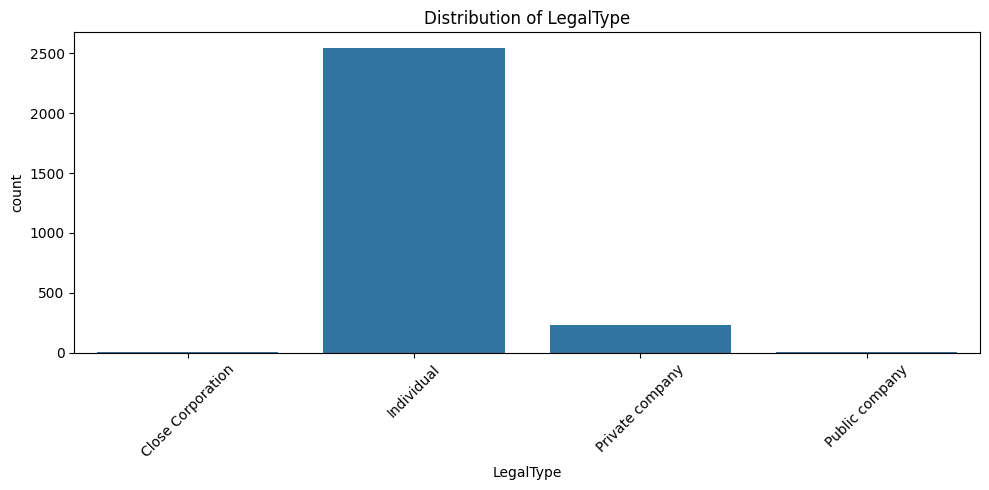

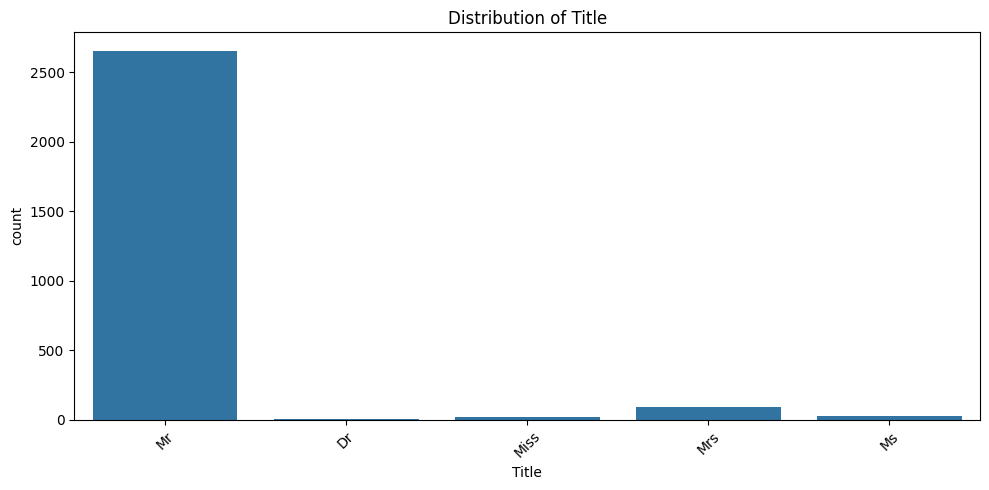

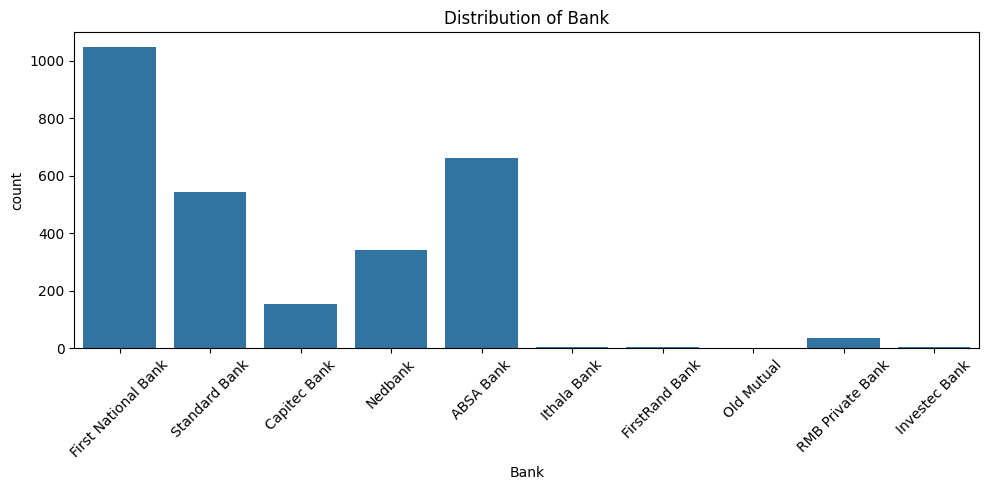

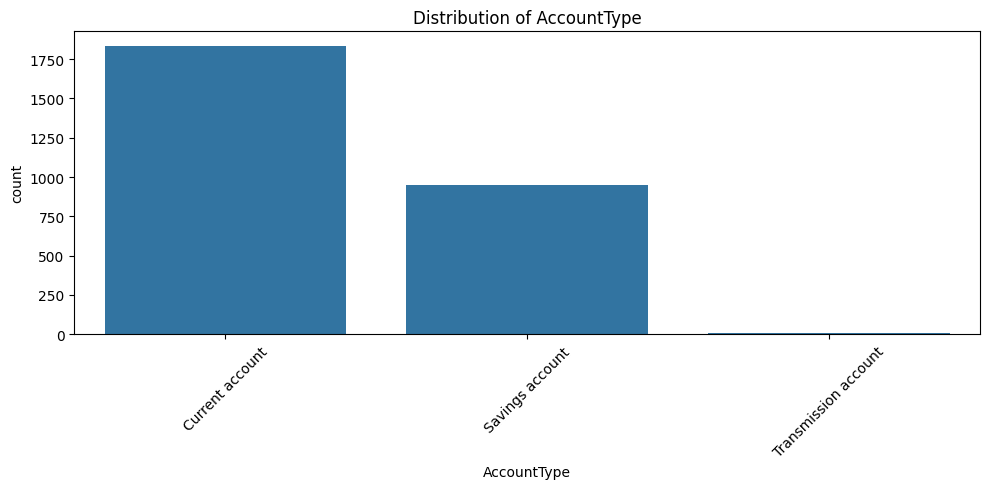

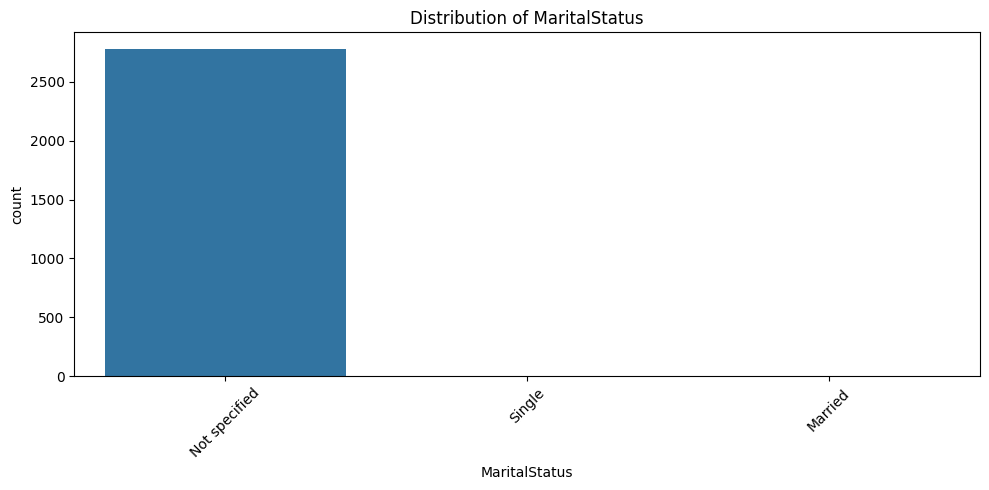

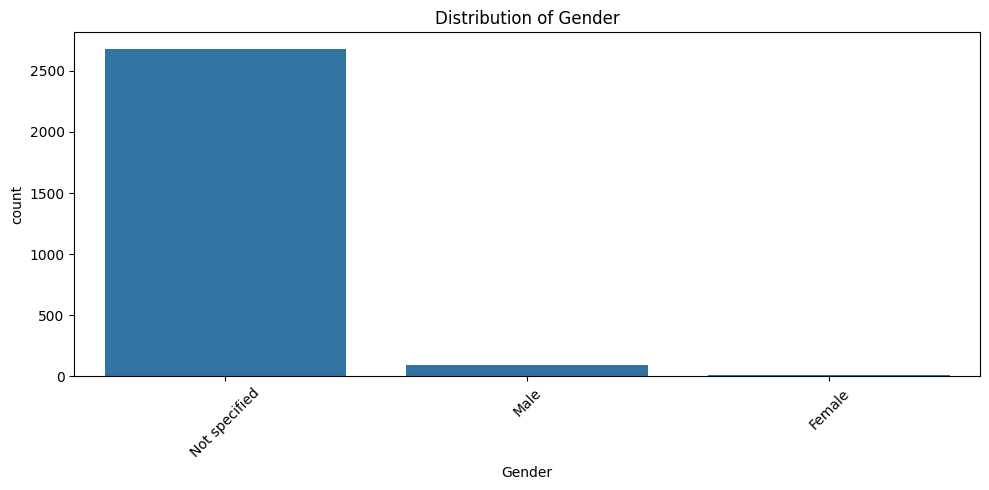

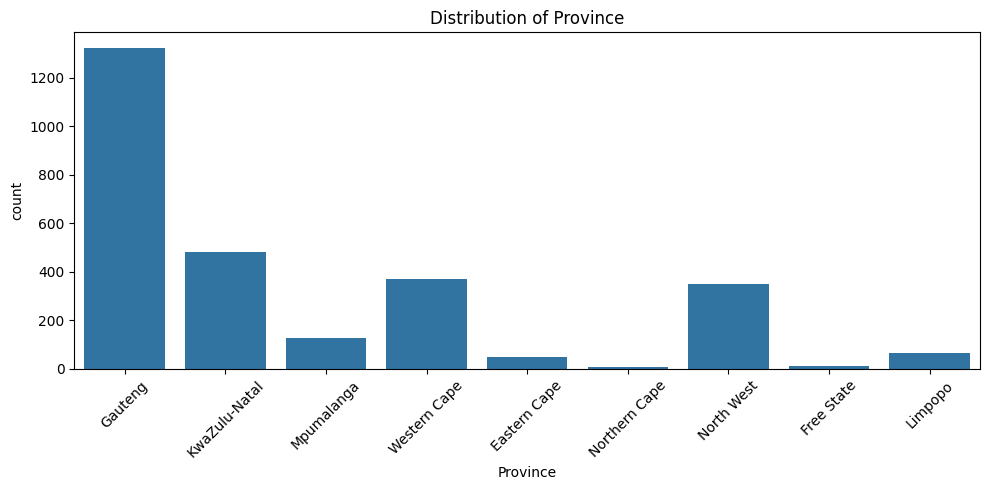

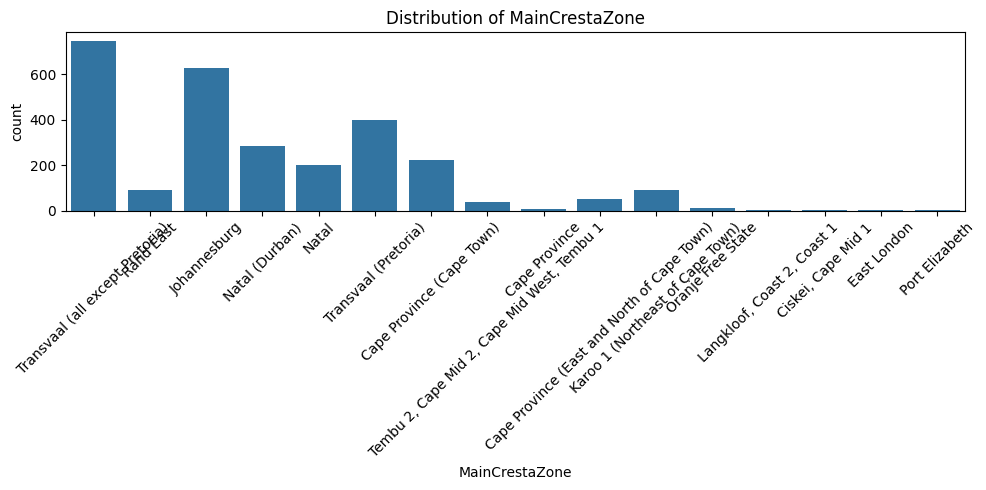

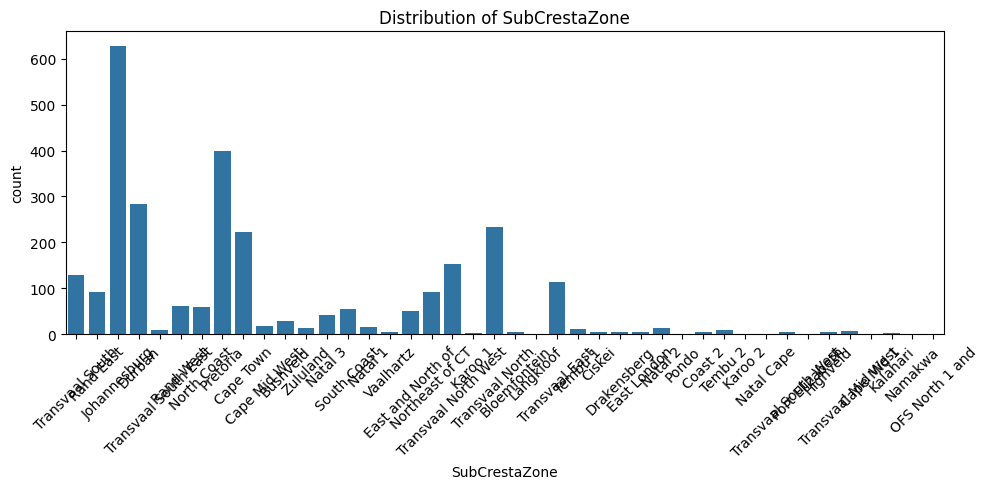

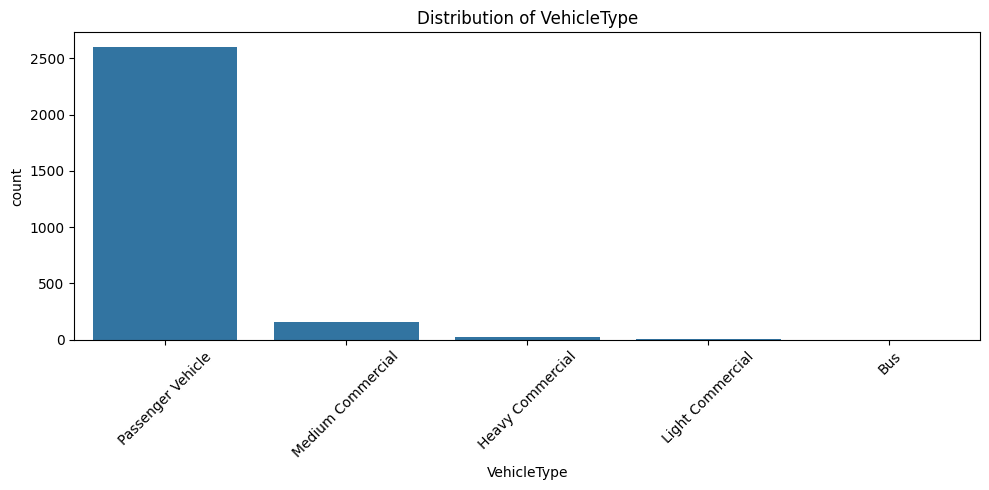

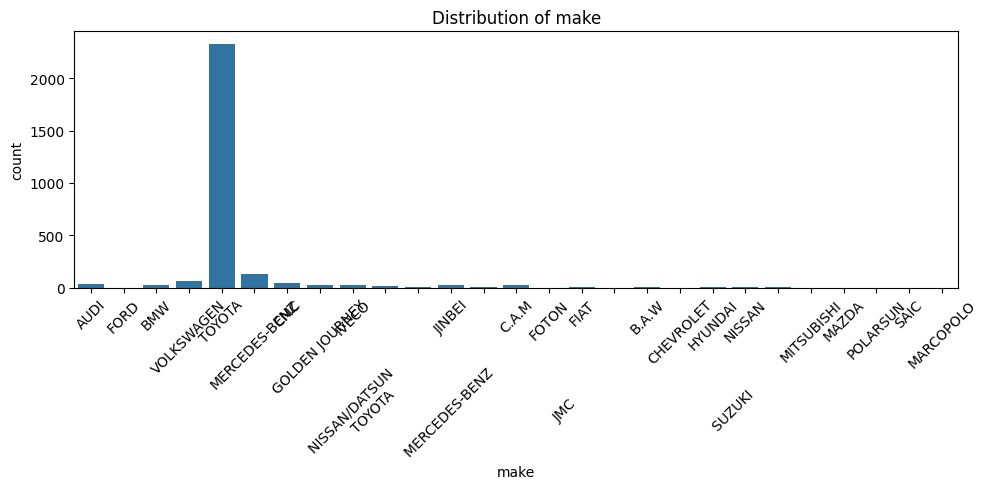

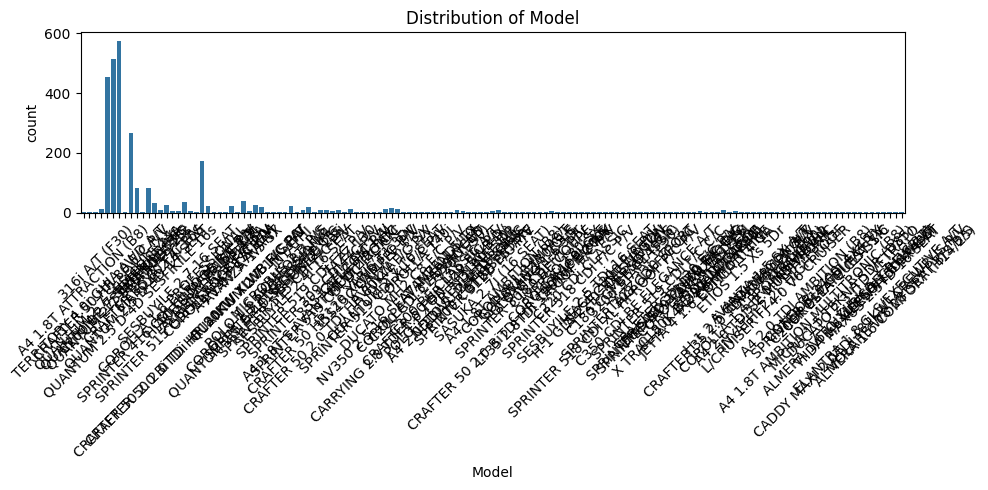

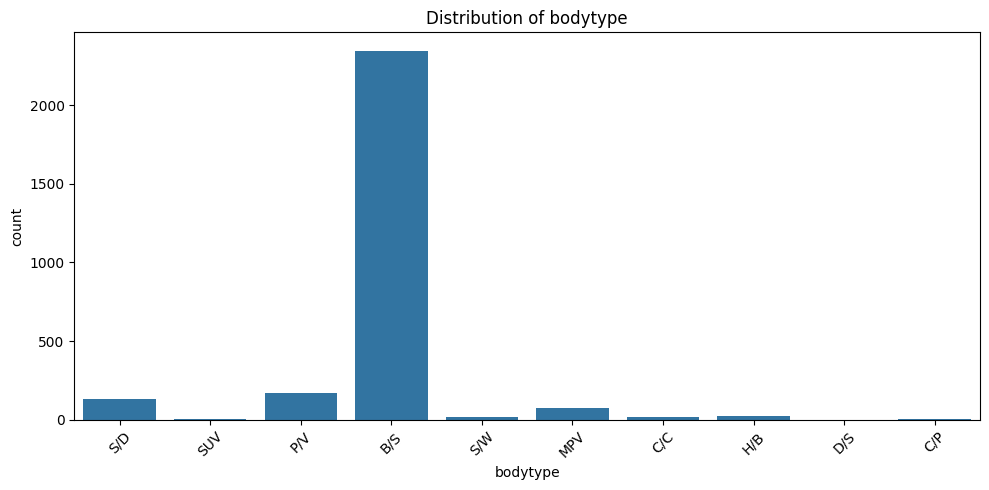

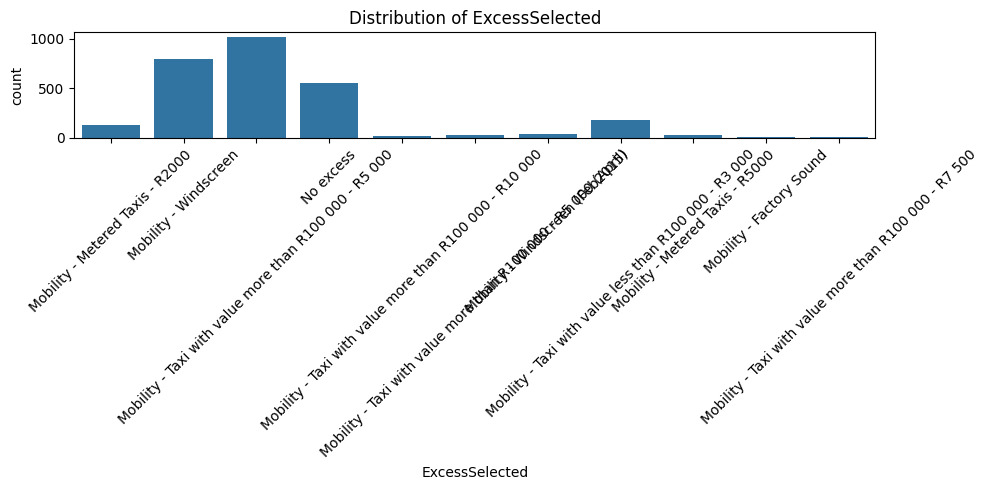

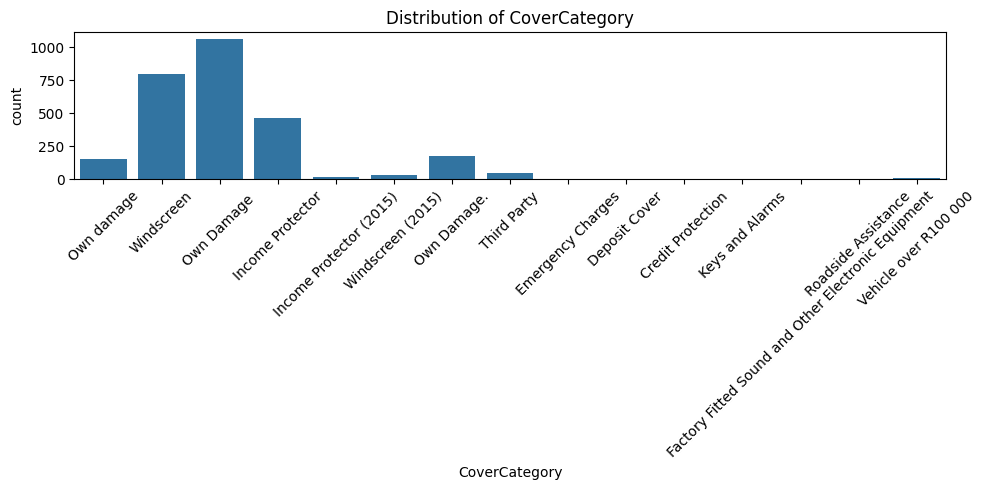

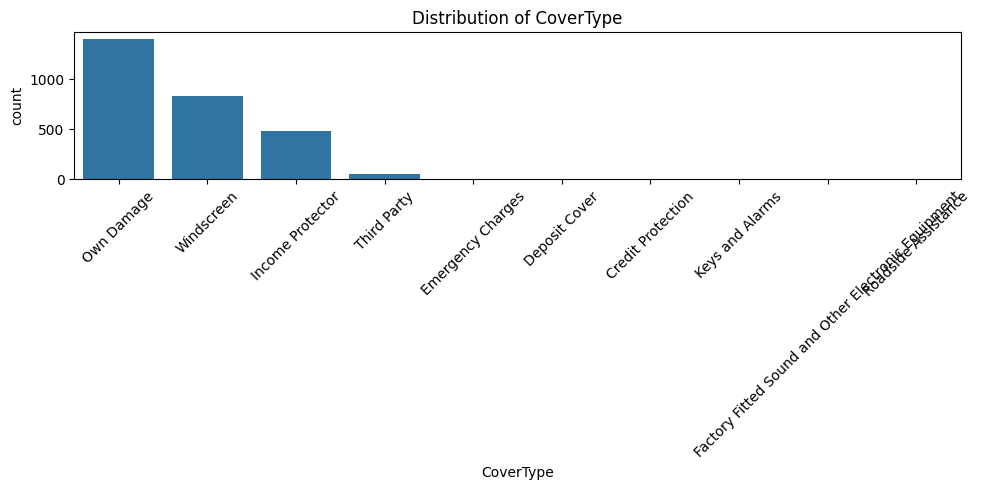

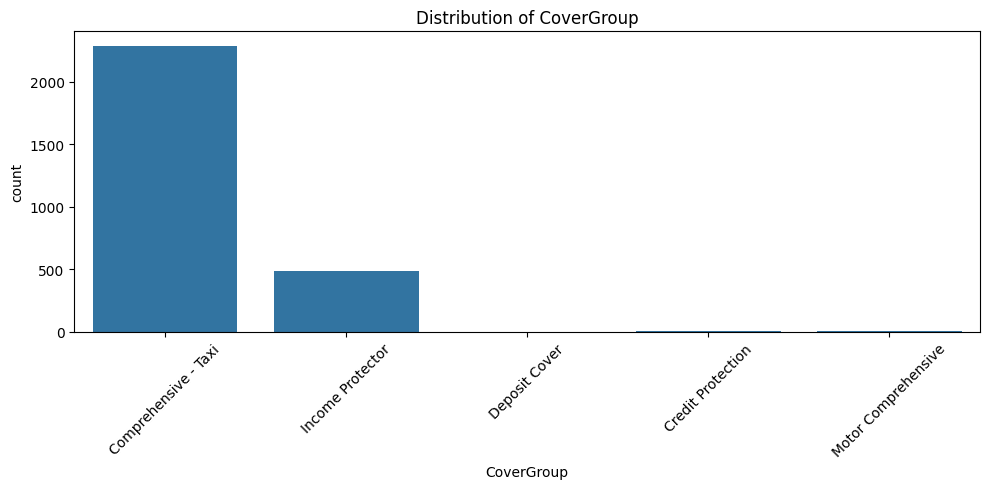

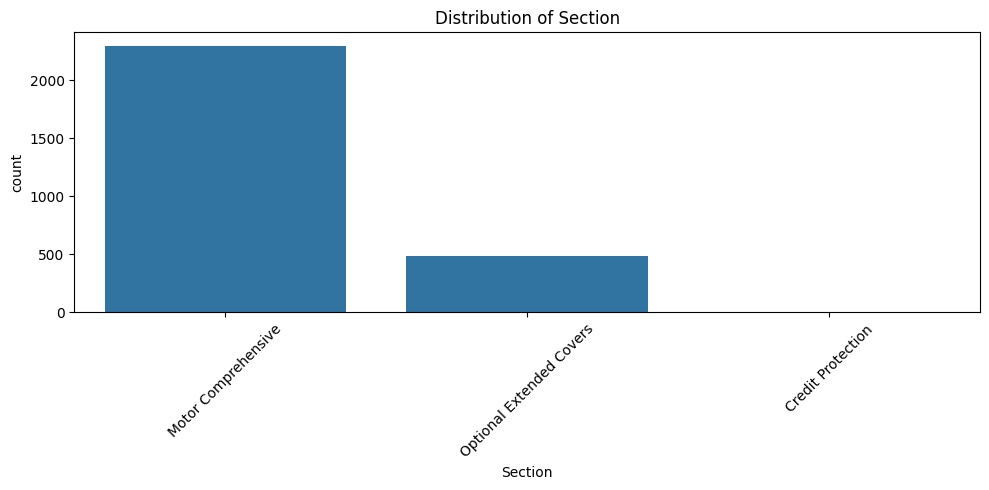

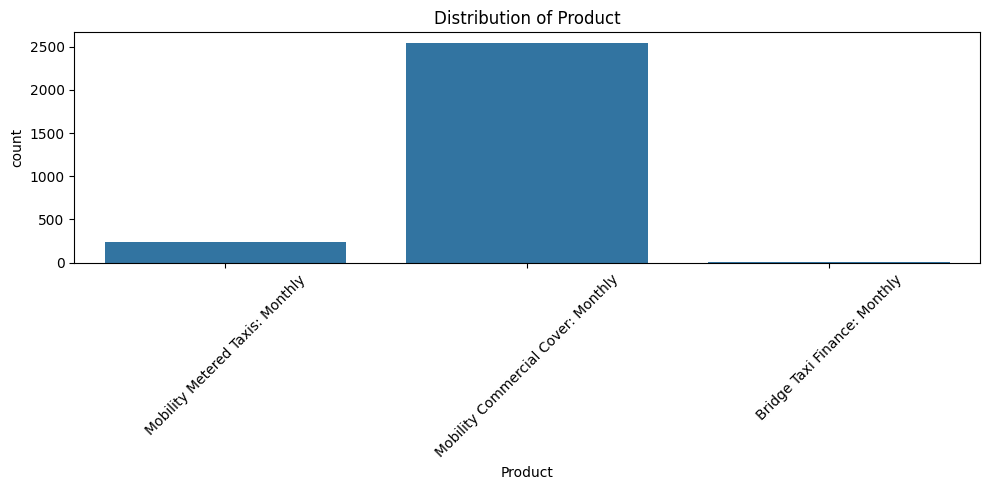

In [222]:
# Loop through each categorical feature to visualize its distribution
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    # Create a count plot to show the frequency of each category
    sns.countplot(
        data=claims_data, 
        x=col, 
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()   # Adjust layout to prevent label
    plt.show()

### Feature Distribution Interpretations

Below are interpretations for the categorical feature distributions provided:

---

#### **TransactionMonth**
- **Observation:** Most transactions are concentrated in 2015, especially from February to July, with a peak in April 2015 (340). Earlier months have much lower counts.
- **Interpretation:** The dataset is heavily skewed toward recent months, possibly due to business growth, improved data collection, or a new product launch.

---

#### **Citizenship**
- **Observation:** Almost all policyholders are South African (ZA), with only one from Zimbabwe (ZW).
- **Interpretation:** The portfolio is almost exclusively domestic, so citizenship is not a useful differentiator.

---

#### **LegalType**
- **Observation:** The majority are individuals (2547), with a smaller number of private companies (232), and very few close/public corporations.
- **Interpretation:** Most policies are held by individuals, but there is a notable business segment.

---

#### **Title**
- **Observation:** "Mr" dominates (2656), with "Mrs", "Ms", and "Miss" much less frequent.
- **Interpretation:** The insured population is predominantly male, or at least, male titles are more frequently recorded.

---

#### **Bank**
- **Observation:** First National Bank, ABSA, and Standard Bank are the most common, with a long tail of other banks.
- **Interpretation:** The customer base is spread across major South African banks, with a few rare entries.

---

#### **AccountType**
- **Observation:** Current and savings accounts are most common, with very few transmission accounts.
- **Interpretation:** Most policyholders use standard banking products.

---

#### **MaritalStatus**
- **Observation:** "Not specified" is overwhelmingly common, with very few "Married" or "Single".
- **Interpretation:** Marital status data is largely missing or not collected, limiting its analytical value.

---

#### **Gender**
- **Observation:** "Not specified" is the majority, with a small number of males and even fewer females.
- **Interpretation:** Gender information is mostly missing, so it may not be useful for segmentation.

---

#### **Province**
- **Observation:** Gauteng has the most policies, followed by KwaZulu-Natal and Western Cape. Other provinces have much lower counts.
- **Interpretation:** The business is concentrated in major economic hubs, with limited presence in smaller provinces.

---

#### **MainCrestaZone & SubCrestaZone**
- **Observation:** Most policies are in Transvaal, Johannesburg, and Pretoria, with a long tail of other zones.
- **Interpretation:** There is a strong geographic concentration in urban and peri-urban areas.

---

#### **VehicleType**
- **Observation:** Passenger vehicles dominate, with some commercial vehicles and very few buses.
- **Interpretation:** The portfolio is primarily private passenger vehicles, with a small commercial segment.

---

#### **make**
- **Observation:** Toyota is by far the most common, followed by Mercedes-Benz and Volkswagen. Many other makes have very low counts.
- **Interpretation:** The insured fleet is dominated by a few popular brands, especially Toyota.

---

#### **Model**
- **Observation:** A few Toyota Quantum models are most common, with a long tail of other models.
- **Interpretation:** The portfolio is highly concentrated in specific vehicle models, likely reflecting the taxi market.

---

#### **bodytype**
- **Observation:** "B/S" (likely bus/sedan) is most common, with a mix of other body types.
- **Interpretation:** There is a focus on certain body types, possibly related to the taxi or commercial market.

---

#### **VehicleIntroDate**
- **Observation:** Most vehicles were introduced in the 2010s, with a spread across several years.
- **Interpretation:** The fleet is relatively modern, with most vehicles less than 10 years old.

---

#### **CapitalOutstanding**
- **Observation:** Most values are zero, with a long tail of positive amounts.
- **Interpretation:** Many vehicles are fully paid off, but some still have outstanding finance.

---

#### **ExcessSelected**
- **Observation:** Most policies have a standard excess, with some opting for windscreen or no excess.
- **Interpretation:** Excess choices are concentrated in a few options, reflecting standard product offerings.

---

#### **CoverCategory, CoverType, CoverGroup, Section**
- **Observation:** "Own Damage" and "Comprehensive" are the most common, with some windscreen and income protection covers.
- **Interpretation:** The majority of policies are comprehensive, with some add-ons for specific risks.

---

#### **Product**
- **Observation:** "Mobility Commercial Cover: Monthly" is the most common product, followed by "Mobility Metered Taxis: Monthly".
- **Interpretation:** The business is focused on monthly commercial vehicle insurance, especially for taxis.

---

### **General Insights**
- Many features are highly imbalanced, with a few dominant categories.
- Some features (e.g., Gender, MaritalStatus, Citizenship) have limited variability or are mostly missing, reducing their usefulness for modeling.
- The portfolio is concentrated in certain provinces, vehicle makes/models, and product types, which should be considered in risk analysis and segmentation.

---

**Recommendation:**  
Focus analysis and modeling on features with meaningful variability and sufficient data. Consider dropping or imputing features with high missingness or low diversity.

### **Check Data Consistency**

**Description:**  
In some categorical features, there are classes that represent the same category but are written differently due to variations in spelling, capitalization, punctuation, or formatting (e.g., "Own Damage", "Own damage", "Own Damage."). These inconsistencies can lead to redundant categories and reduce data quality.

**Action:**  
To ensure consistency and improve analysis, standardize class names within each categorical feature by:
- Converting all class names to lowercase (or a chosen case)
- Stripping leading/trailing whitespace
- Removing or standardizing punctuation
- Replacing known synonyms or variants with a single, consistent label

This process will help merge duplicate categories, simplify data exploration, and enhance model performance.

In [223]:
import re

# Function to standardize class names: lowercase, remove special characters, replace spaces with underscores
def clean_class_name(x):
    if isinstance(x, str):
        x = x.lower() # Convert to lowercase
        
        x = re.sub(r'[^\w\s]', '', x)  # Remove special characters
        x = x.strip()
        x = re.sub(r'\s+', '_', x)     # Replace spaces with underscores
        return x
    return x

# Apply to all categorical features
for col in categorical_features:
    claims_data[col] = claims_data[col].apply(clean_class_name)

In [224]:
for col in categorical_features:
    print(claims_data[col].value_counts())
    print("*********************************************************")

Citizenship
za    2787
zw       1
Name: count, dtype: int64
*********************************************************
LegalType
individual           2547
private_company       232
close_corporation       6
public_company          3
Name: count, dtype: int64
*********************************************************
Title
mr      2656
mrs       88
ms        23
miss      19
dr         2
Name: count, dtype: int64
*********************************************************
Bank
first_national_bank    1047
absa_bank               661
standard_bank           544
nedbank                 342
capitec_bank            152
rmb_private_bank         34
ithala_bank               3
firstrand_bank            2
investec_bank             2
old_mutual                1
Name: count, dtype: int64
*********************************************************
AccountType
current_account         1835
savings_account          947
transmission_account       6
Name: count, dtype: int64
***********************************

In [225]:

mask = claims_data['Title'] == 'mr'

claims_data[mask]["Gender"].value_counts()


Gender
not_specified    2562
male               94
Name: count, dtype: int64

In [226]:
# Map Title to Gender for consistency where Gender is missing or 'Not specified'
title_gender_map = {
    'mr': 'male',
    'mrs': 'female',
    'ms': 'female',
    'miss': 'female',
    'dr': "not_specified"
}

# Update Gender based on Title where Gender is missing or 'Not specified'
mask = (claims_data['Gender'] == 'not_specified')
claims_data.loc[mask, 'Gender'] = claims_data.loc[mask, 'Title'].map(title_gender_map).fillna(claims_data.loc[mask, 'Gender'])

In [227]:
claims_data.Gender.value_counts()

Gender
male             2656
female            130
not_specified       2
Name: count, dtype: int64

## Rare Class of categorical Features

**Description:**  
This code iterates through each categorical feature in the `claims_data` DataFrame. For each feature, it identifies categories (classes) that appear fewer than 100 times and replaces those rare categories with the label `'Other'`. This process helps to reduce the impact of infrequent categories, making the data more manageable and improving the performance and generalization of machine learning models.

In [228]:
# Iterate over each categorical feature
for col in categorical_features:
    # Get value counts for the column
    value_counts = claims_data[col].value_counts()
    # Identify classes with fewer than 100 occurrences
    rare_classes = value_counts[value_counts < 100].index
    # Replace rare classes with 'Other'
    claims_data[col] = claims_data[col].apply(lambda x: 'other' if x in rare_classes else x)

In [229]:
for col in categorical_features:
    print(claims_data[col].value_counts())
    print()

Citizenship
za       2787
other       1
Name: count, dtype: int64

LegalType
individual         2547
private_company     232
other                 9
Name: count, dtype: int64

Title
mr       2656
other     132
Name: count, dtype: int64

Bank
first_national_bank    1047
absa_bank               661
standard_bank           544
nedbank                 342
capitec_bank            152
other                    42
Name: count, dtype: int64

AccountType
current_account    1835
savings_account     947
other                 6
Name: count, dtype: int64

MaritalStatus
not_specified    2778
other              10
Name: count, dtype: int64

Gender
male      2656
female     130
other        2
Name: count, dtype: int64

Province
gauteng         1322
kwazulunatal     483
western_cape     370
north_west       349
other            136
mpumalanga       128
Name: count, dtype: int64

MainCrestaZone
transvaal_all_except_pretoria    748
johannesburg                     628
transvaal_pretoria               398


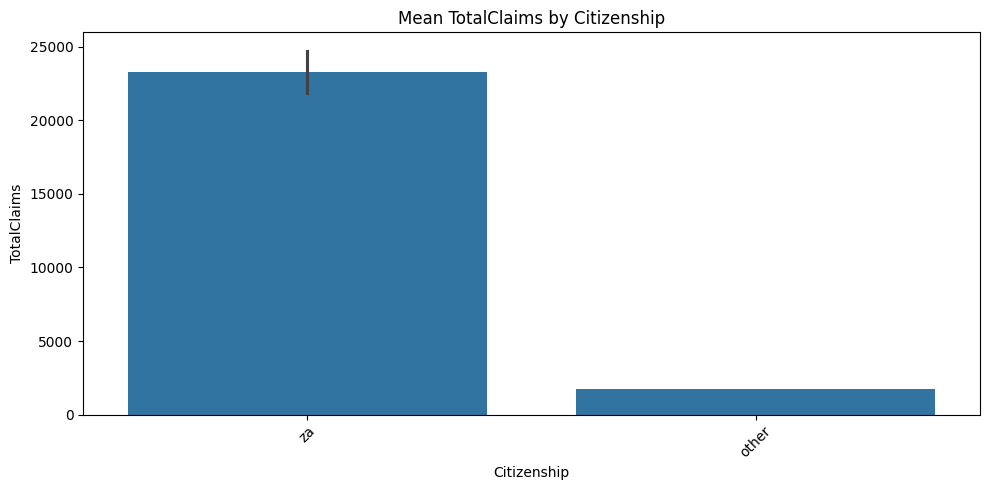

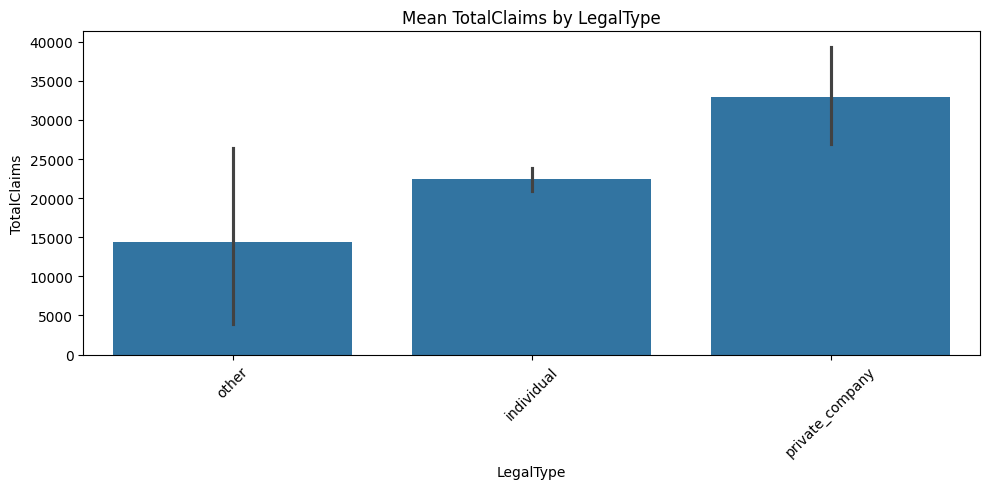

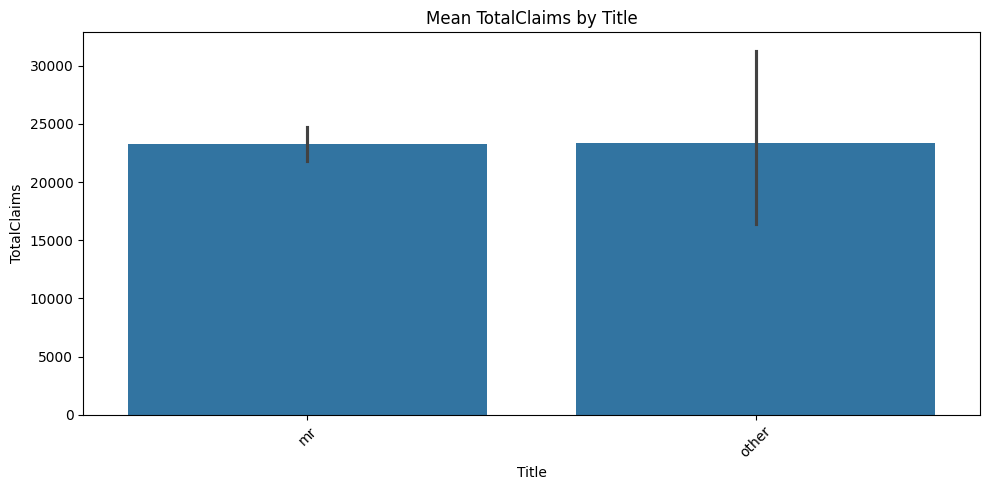

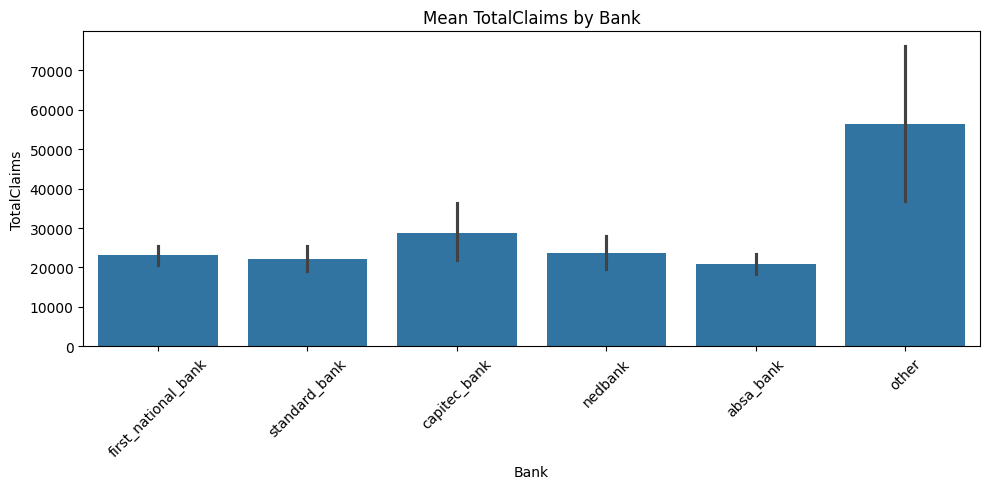

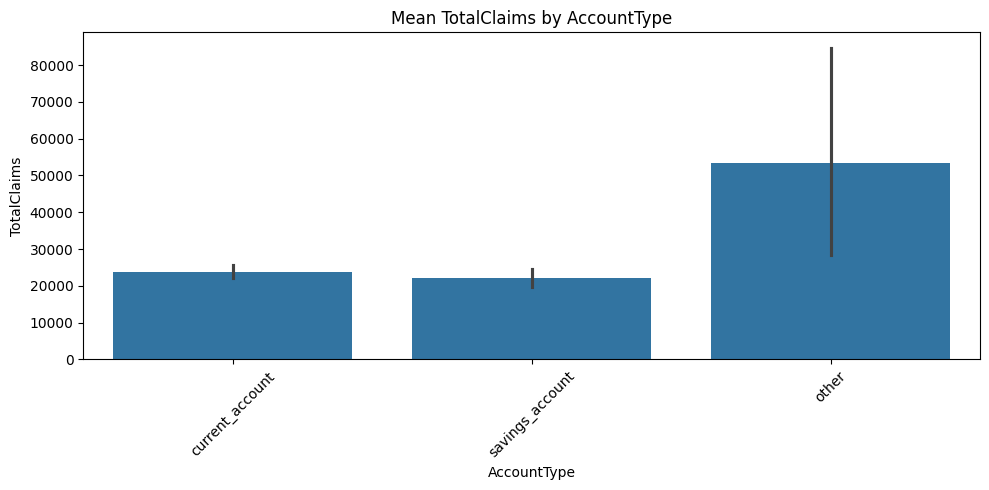

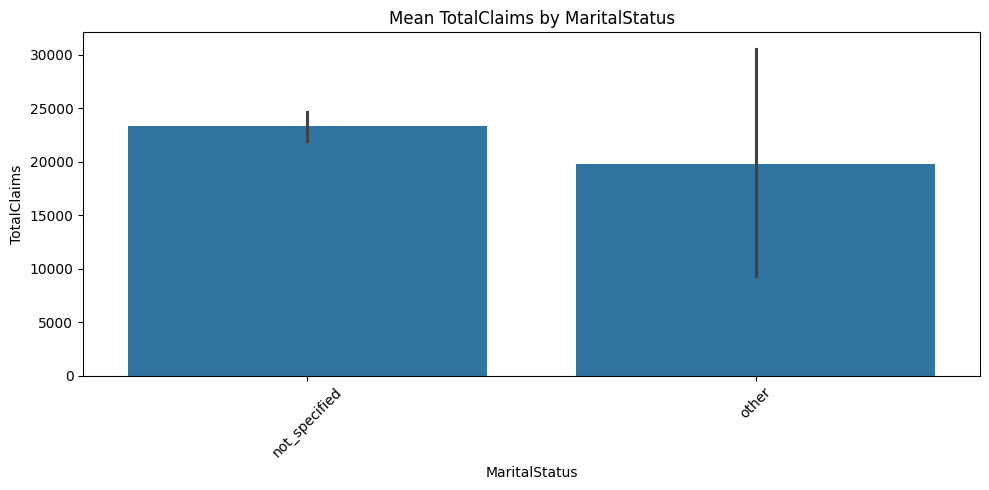

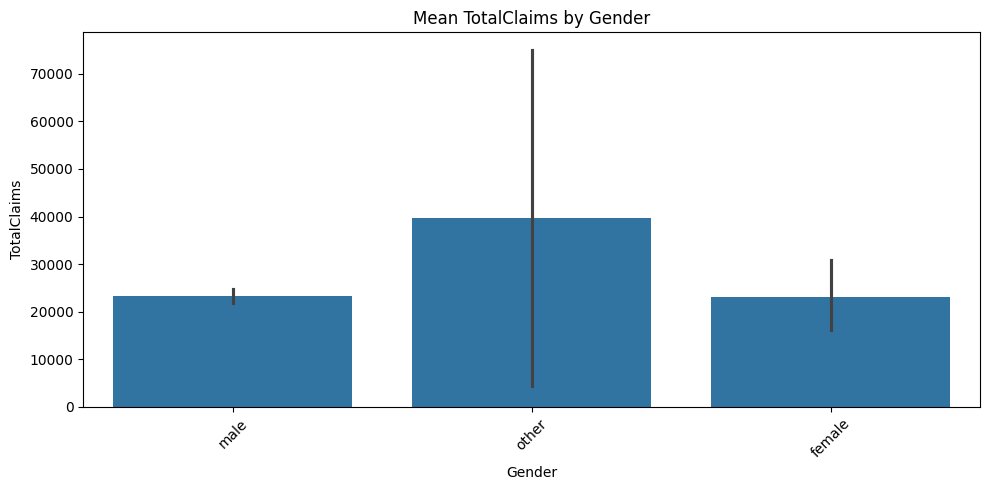

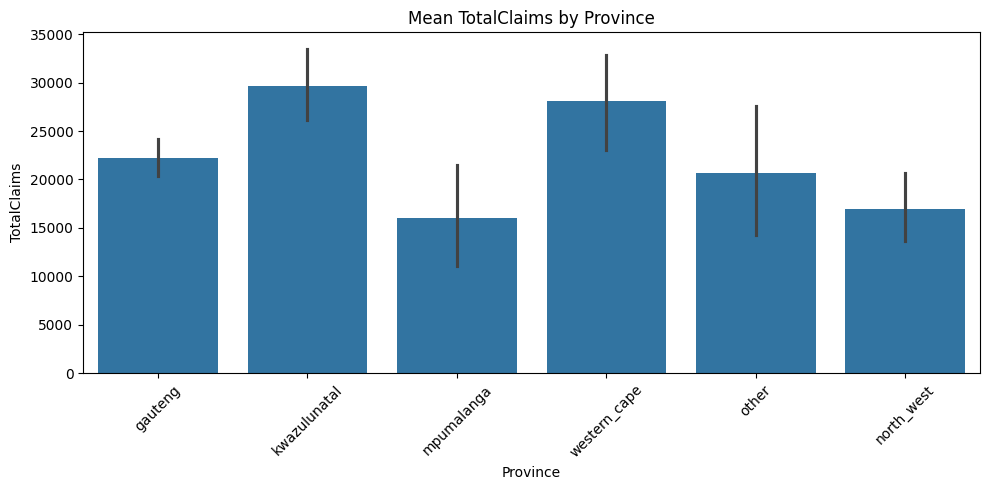

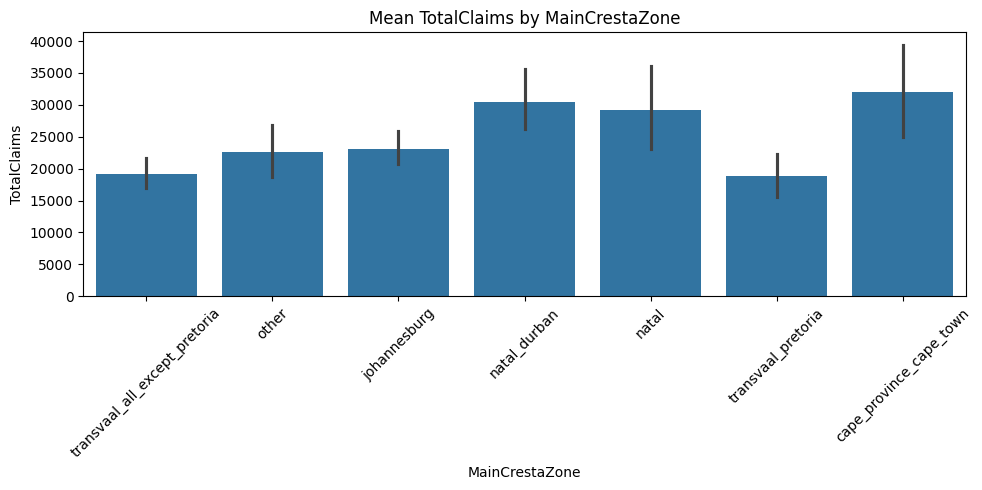

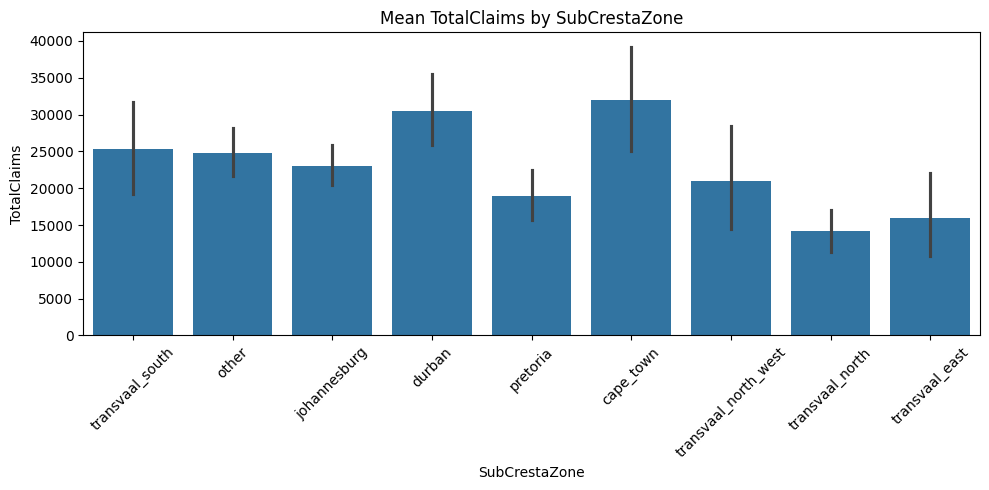

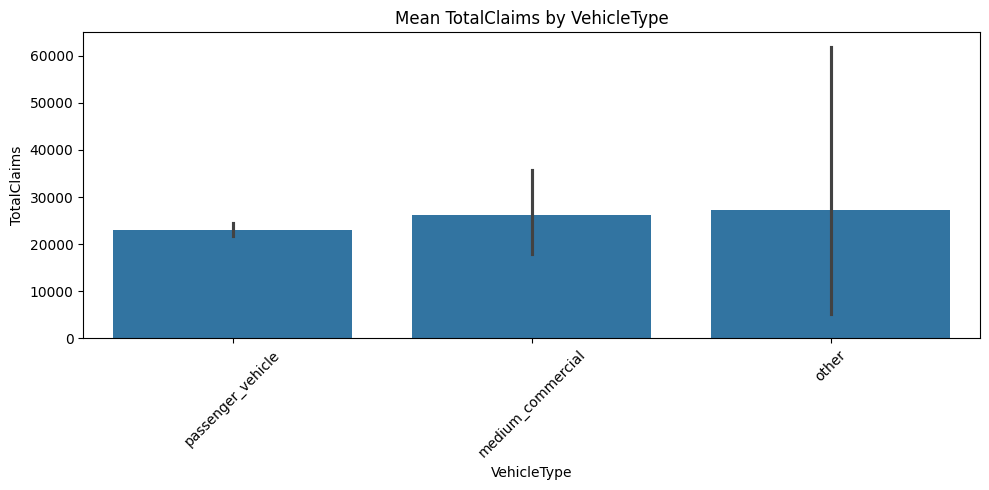

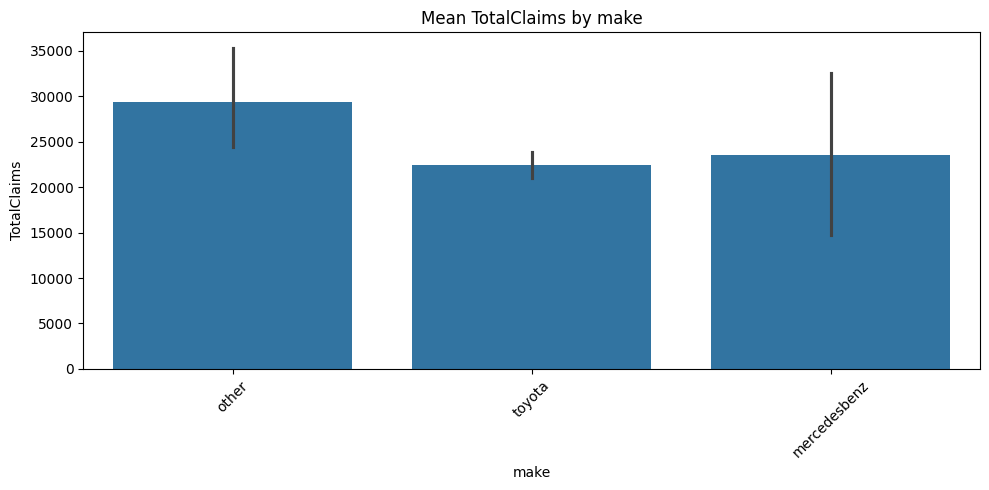

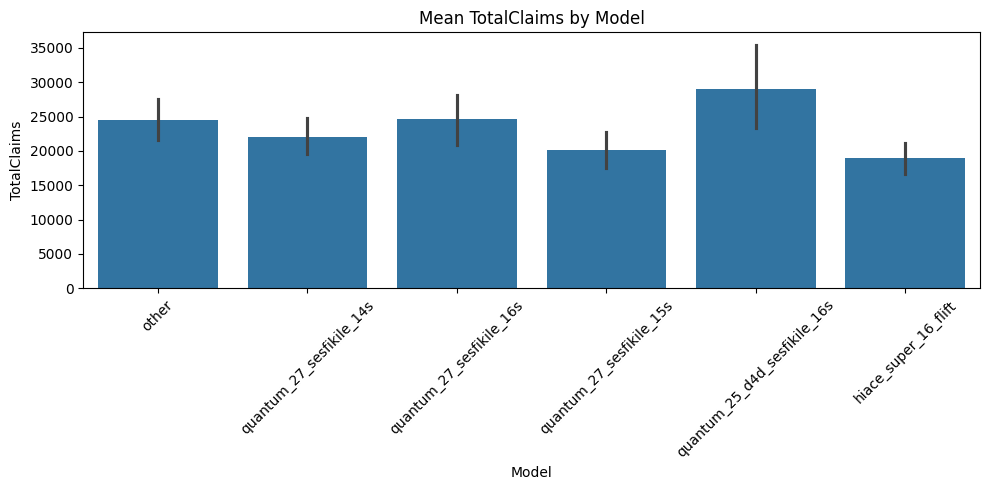

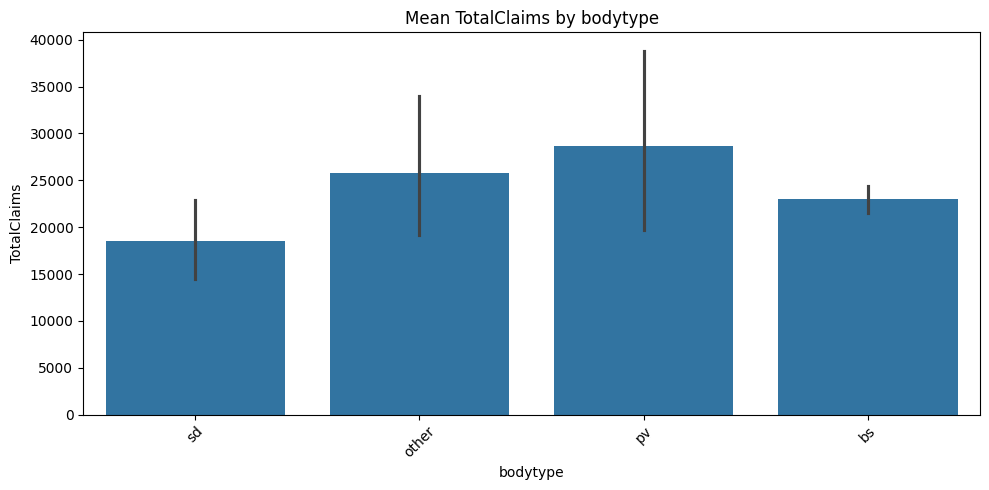

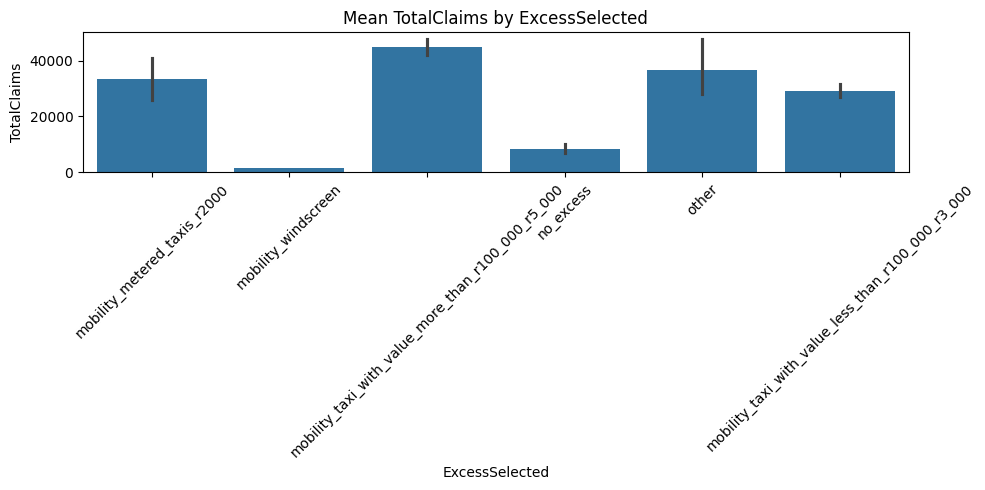

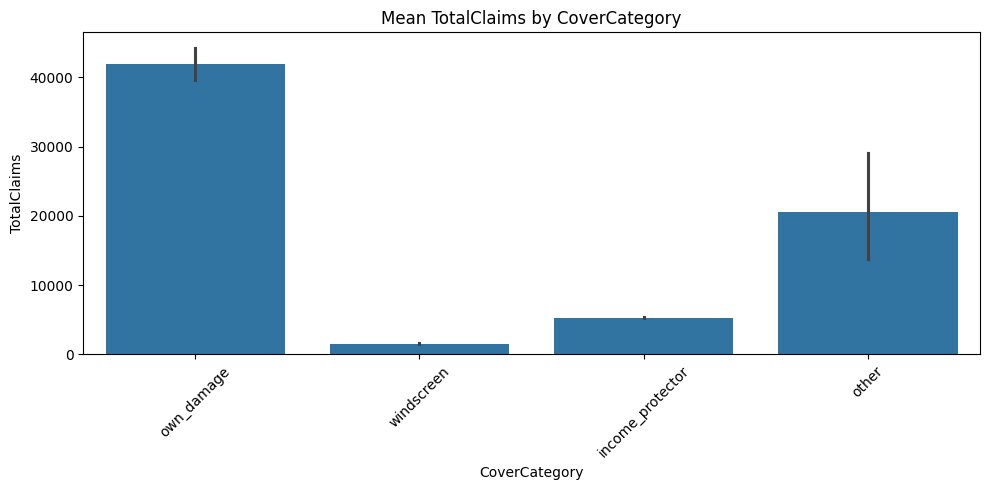

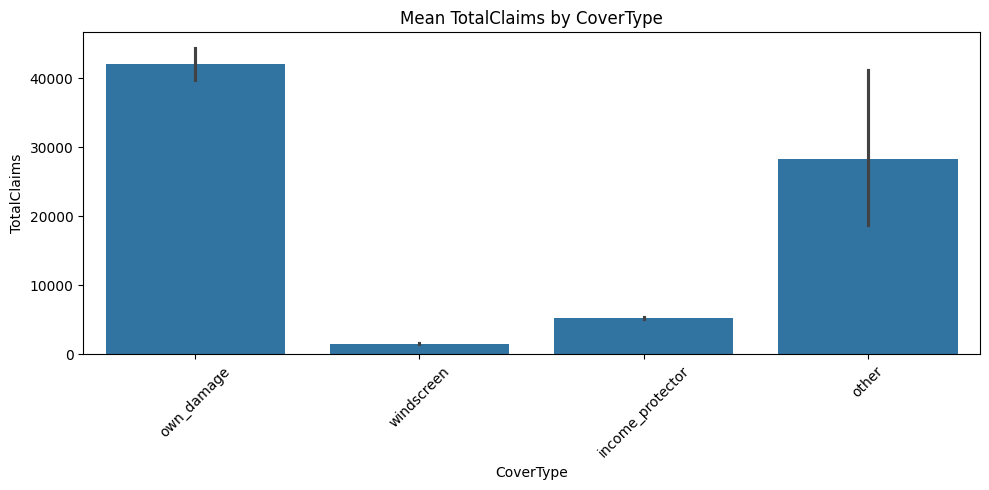

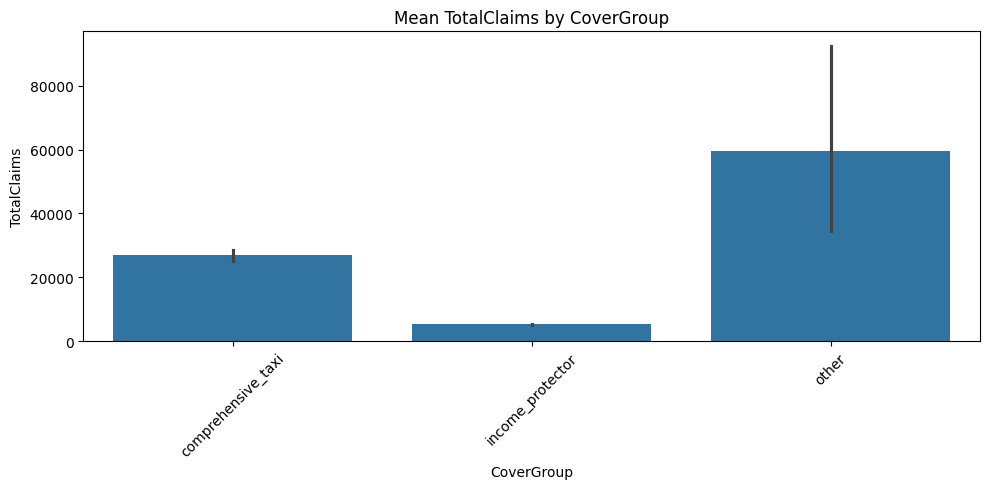

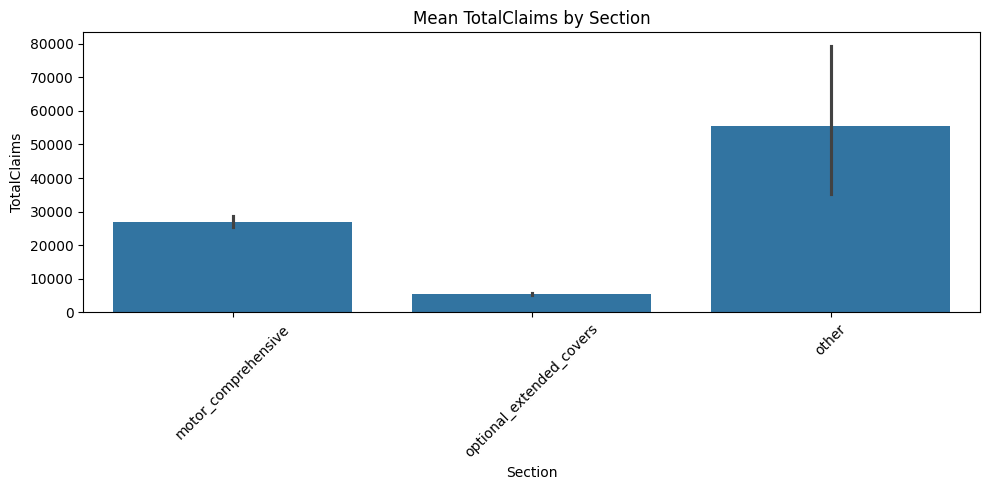

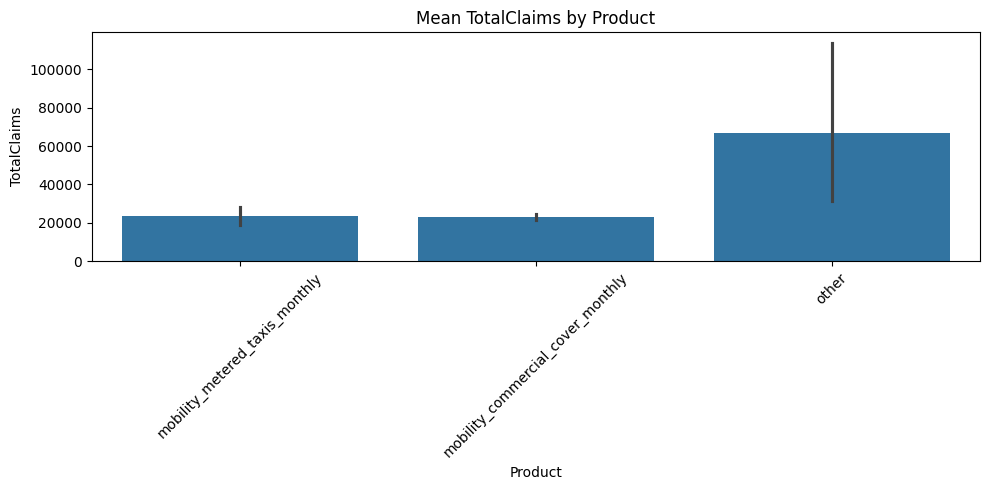

In [230]:

# Replace 'TotalClaims' with your target numerical column if needed
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    # Create a barplot showing the mean of TotalClaims for each category
    sns.barplot(
        data=claims_data,
        x=col,
        y="TotalClaims",
        estimator='mean'
    )
    plt.title(f"Mean TotalClaims by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [231]:
column_names = []

for col in claims_data.columns:
    print(col)

UnderwrittenCoverID
PolicyID
TransactionMonth
IsVATRegistered
Citizenship
LegalType
Title
Bank
AccountType
MaritalStatus
Gender
Province
PostalCode
MainCrestaZone
SubCrestaZone
mmcode
VehicleType
RegistrationYear
make
Model
Cylinders
cubiccapacity
kilowatts
bodytype
NumberOfDoors
VehicleIntroDate
CustomValueEstimate
AlarmImmobiliser
TrackingDevice
CapitalOutstanding
NumberOfVehiclesInFleet
SumInsured
CalculatedPremiumPerTerm
ExcessSelected
CoverCategory
CoverType
CoverGroup
Section
Product
TotalPremium
TotalClaims


### **Feature Engineering**

In [232]:
# Calculate the age of the vehicle in years by subtracting VehicleIntroDate from TransactionMonth
# Assumes both columns are in datetime format
claims_data["vehicle_year"] = (claims_data["TransactionMonth"] - claims_data["VehicleIntroDate"]).dt.days

In [233]:
claims_data["vehicle_year"].describe()

count    2788.000000
mean     2326.336801
std      1817.208102
min       184.000000
25%      1155.000000
50%      1643.000000
75%      2708.000000
max      8277.000000
Name: vehicle_year, dtype: float64

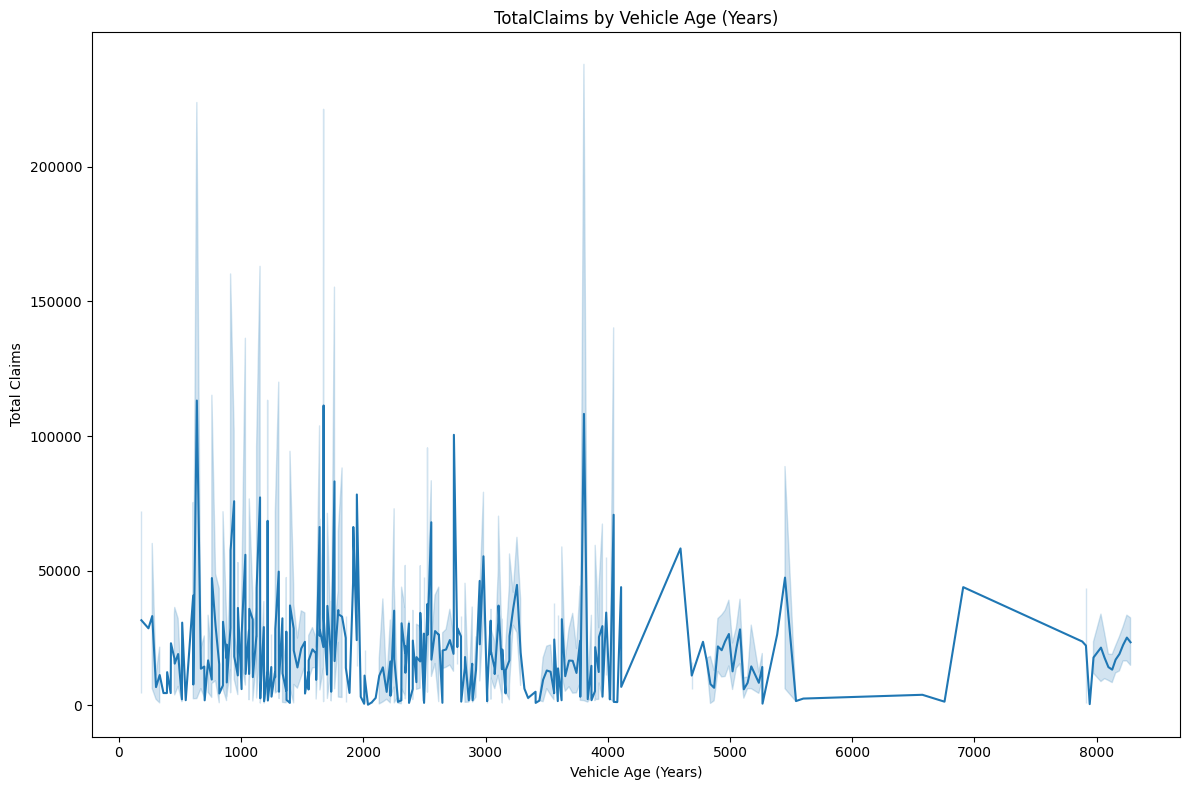

In [234]:
plt.figure(figsize=(12, 8))  # Set the figure size

# Line plot of TotalClaims by vehicle_year
sns.lineplot(
    data=claims_data, 
    x="vehicle_year", 
    y="TotalClaims"
)
plt.title("TotalClaims by Vehicle Age (Years)")
plt.xlabel("Vehicle Age (Years)")
plt.ylabel("Total Claims")
plt.tight_layout()
plt.show()

In [235]:
claims_data[["vehicle_year", "TotalClaims"]].corr()

,vehicle_year,TotalClaims
vehicle_year,1.000000,-0.053518
TotalClaims,-0.053518,1.000000


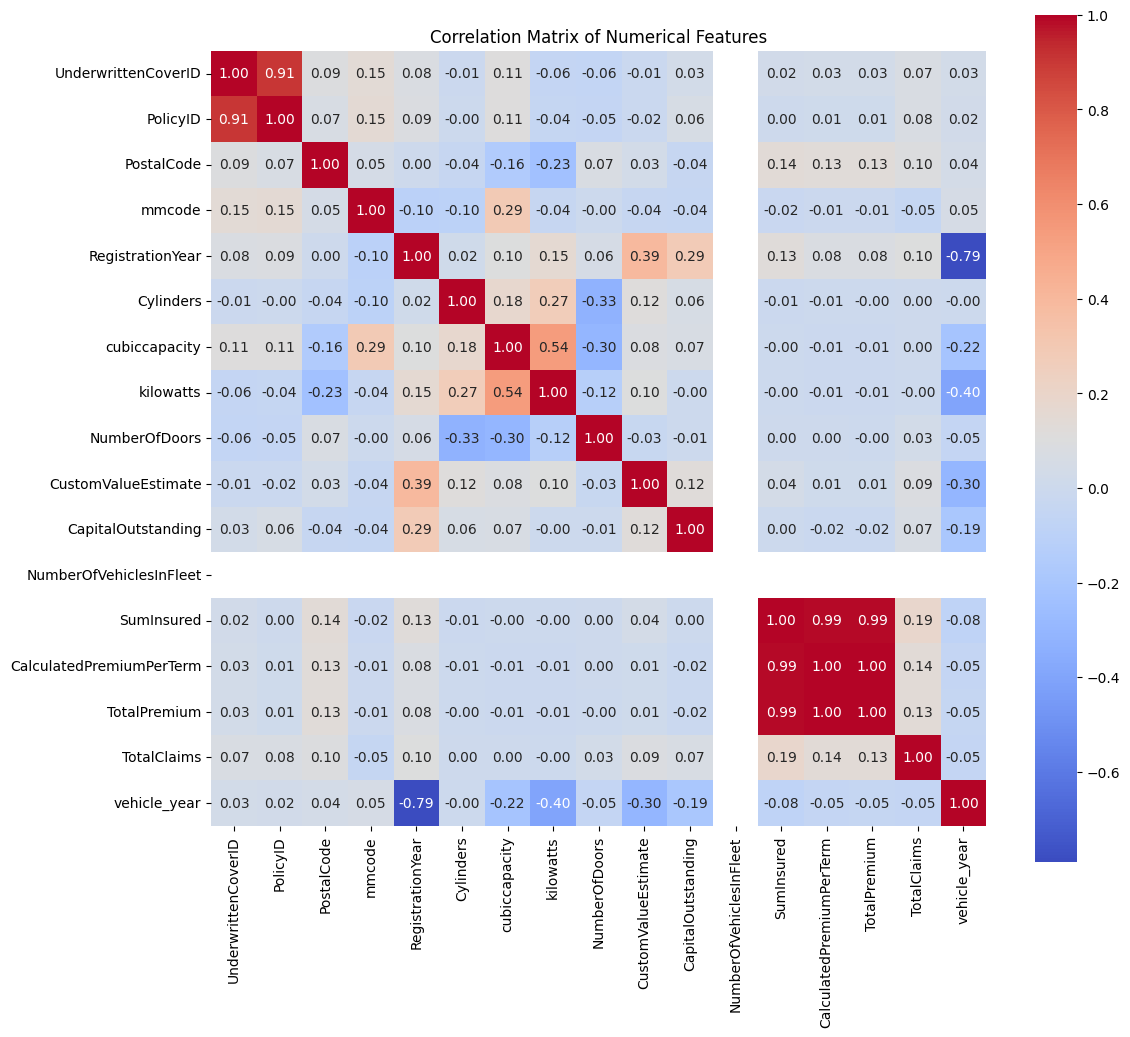

In [236]:

# Select numerical features
num_features = claims_data.select_dtypes(include="number").columns

# Compute the correlation matrix
corr_mat = claims_data[num_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr_mat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

In [237]:
# Calculate the correlation of each numerical feature with the target variable (e.g., 'TotalClaims')
target_col = "TotalClaims"
correlations = claims_data[num_features].corr()[target_col].drop(target_col)

# Select features with low absolute correlation (e.g., less than 0.1)
low_correlation_with_target = correlations[correlations.abs() < 0.05].index.to_list()

print("Features with low correlation with target:", low_correlation_with_target)

claims_data = claims_data.drop(columns=low_correlation_with_target)

Features with low correlation with target: ['mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors']


In [238]:
# Extract the year from the TransactionMonth column and create a new 'year' column
claims_data["year"] = claims_data["TransactionMonth"].dt.year

claims_data.drop(columns=["TransactionMonth", "VehicleIntroDate"], inplace=True)

In [239]:
def encode_categorical_features_by_claims(df, categorical_features, target_col="TotalClaims"):
    """
    Encodes categorical features in a DataFrame:
    - If a feature has more than 5 unique classes, uses target-based label encoding (mean TotalClaims).
    - If a feature has 5 or fewer unique classes, uses one-hot encoding.
    Returns a new DataFrame with encoded features.
    """
    df_encoded = df.copy()
    for col in categorical_features:
        n_unique = df_encoded[col].nunique()
        if n_unique > 5:
            # Target-based label encoding: map each category to mean TotalClaims
            means = df_encoded.groupby(col)[target_col].mean()
            df_encoded[col] = df_encoded[col].map(means)
        else:
            # One-hot encoding for features with 5 or fewer classes
            dummies = pd.get_dummies(df_encoded[col], prefix=col)
            df_encoded = pd.concat([df_encoded.drop(columns=[col]), dummies], axis=1)
            
    return df_encoded

df_encoded = encode_categorical_features_by_claims(df=claims_data, categorical_features=categorical_features)

df_encoded.shape

(2788, 64)

## **FEATURE ENGINEERING**

### **Constant Features**

In [240]:
df_encoded[boolean_features].value_counts()

IsVATRegistered  AlarmImmobiliser  TrackingDevice
True             True              True              2788
Name: count, dtype: int64

In [241]:
df_encoded = df_encoded.drop(columns=boolean_features)
df_encoded.shape

(2788, 61)

In [242]:
# Get the list of all features in the encoded DataFrame
features = df_encoded.columns.to_list()

# Calculate the variance for each feature
feature_variances = df_encoded[features].var()

print("Variance of each feature in the encoded DataFrame:")

feature_variances.head(20)

Variance of each feature in the encoded DataFrame:


UnderwrittenCoverID         3.208283e+09
PolicyID                    2.259712e+07
Bank                        1.977452e+07
Province                    1.829616e+07
PostalCode                  6.028837e+06
MainCrestaZone              2.097708e+07
SubCrestaZone               2.404119e+07
RegistrationYear            8.715497e+00
Model                       7.520061e+06
CustomValueEstimate         1.840401e+09
CapitalOutstanding          9.805119e+09
NumberOfVehiclesInFleet              NaN
SumInsured                  3.266489e+11
CalculatedPremiumPerTerm    1.090605e+07
ExcessSelected              3.618668e+08
TotalPremium                8.212573e+06
TotalClaims                 1.499201e+09
vehicle_year                3.302245e+06
year                        1.934659e-01
Citizenship_other           3.586801e-04
dtype: float64

In [243]:
from sklearn.model_selection import train_test_split


df_encoded = df_encoded.drop(columns="NumberOfVehiclesInFleet")
X = df_encoded.drop(columns=["TotalClaims"])

y = df_encoded["TotalClaims"]

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(2230, 59) (558, 59)


In [245]:
for col in df_encoded.columns:
    print(col, df_encoded[col].isna().sum())

UnderwrittenCoverID 0
PolicyID 0
Bank 0
Province 0
PostalCode 0
MainCrestaZone 0
SubCrestaZone 0
RegistrationYear 0
Model 0
CustomValueEstimate 0
CapitalOutstanding 0
SumInsured 0
CalculatedPremiumPerTerm 0
ExcessSelected 0
TotalPremium 0
TotalClaims 0
vehicle_year 0
year 0
Citizenship_other 0
Citizenship_za 0
LegalType_individual 0
LegalType_other 0
LegalType_private_company 0
Title_mr 0
Title_other 0
AccountType_current_account 0
AccountType_other 0
AccountType_savings_account 0
MaritalStatus_not_specified 0
MaritalStatus_other 0
Gender_female 0
Gender_male 0
Gender_other 0
VehicleType_medium_commercial 0
VehicleType_other 0
VehicleType_passenger_vehicle 0
make_mercedesbenz 0
make_other 0
make_toyota 0
bodytype_bs 0
bodytype_other 0
bodytype_pv 0
bodytype_sd 0
CoverCategory_income_protector 0
CoverCategory_other 0
CoverCategory_own_damage 0
CoverCategory_windscreen 0
CoverType_income_protector 0
CoverType_other 0
CoverType_own_damage 0
CoverType_windscreen 0
CoverGroup_comprehensive_

## Baseline Prediction

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Predict the mean of y_train for all test samples (baseline model)
y_pred = np.full(len(y_test), y_train.mean())

r2 = r2_score(y_test, y_pred)

print(f"Baseline R-squared: {r2:.4f}")

Baseline R-squared: -0.0000


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets


print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Dictionary to store model scores: model_name -> [RMSE, R2]
scores = {}

# List of regression models to evaluate
models = [
    LinearRegression(), 
    GradientBoostingRegressor(),
    RandomForestRegressor(), 
    XGBRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    scores[model.__class__.__name__] = [rmse, r2]

print("Model Evaluation Scores (RMSE, R2):")
for model_name, score in scores.items():
    print(f"{model_name}: RMSE={score[0]:.4f}, R2={score[1]:.4f}")

Training set shape: (2230, 53)
Testing set shape: (558, 53)
Model Evaluation Scores (RMSE, R2):
LinearRegression: RMSE=1131649187.1405, R2=0.2963
GradientBoostingRegressor: RMSE=1180485662.8788, R2=0.2660
RandomForestRegressor: RMSE=1251037325.6476, R2=0.2221
XGBRegressor: RMSE=1586780482.8231, R2=0.0133


In [ ]:
## feature correaltions

### Best model

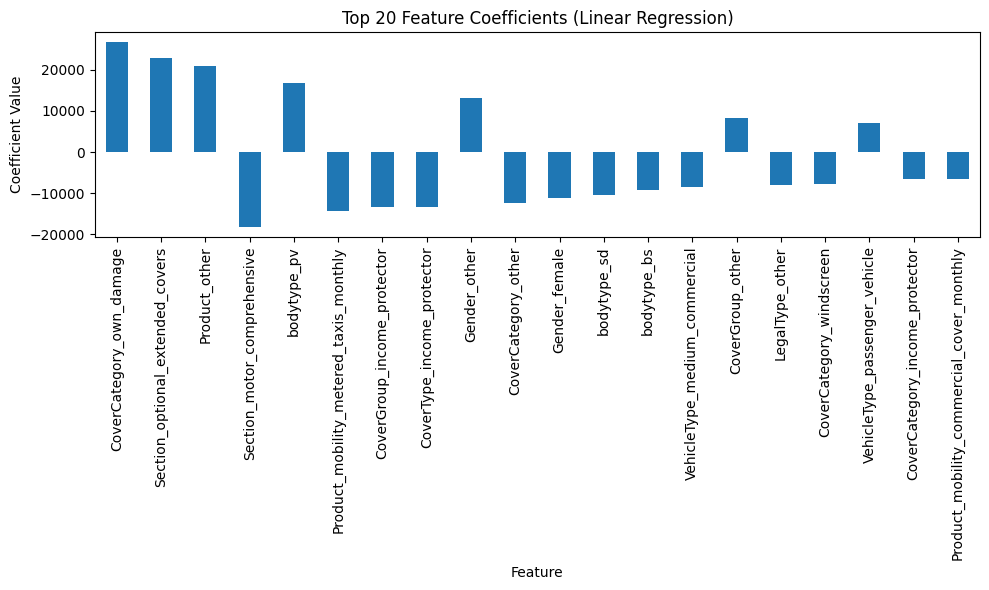

In [250]:

lr = LinearRegression()
lr.fit(X_train, y_train)

# Get feature coefficients
coefficients = pd.Series(lr.coef_, index=X_train.columns)

# Sort coefficients by absolute value
coefficients = coefficients.reindex(coefficients.abs().sort_values(ascending=False).index)

# Plot the top 20 coefficients
plt.figure(figsize=(10, 6))
coefficients.head(20).plot(kind='bar')
plt.title("Top 20 Feature Coefficients (Linear Regression)")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


- The most important features are coverage-related (`CoverCategory_own_damage`, `Section_optional_extended_covers`, `Product_other`).
- Vehicle features like `make`, `model`, and `bodytype` have moderate influence.
- Many features have very high missing data, limiting their usefulness.
- The linear model explains about 30% of the variation; other models perform slightly worse.
- Focus on top coverage and vehicle features, improve data quality, and consider feature engineering for better results.

Let me know if you'd like a quick action plan!

### Project Summary, Data Quality, Feature Engineering, and Model Insights

---

#### **Missing Data Overview**
- Several features have extremely high missing rates:
  - `NumberOfVehiclesInFleet` (100%)
  - `CrossBorder` (99.93%)
  - `Citizenship` (89.51%)
  - `CustomValueEstimate` (77.96%)
  - `WrittenOff` (64.18%)
- **Interpretation:**  
  Features with high missingness are typically dropped or require special handling, as they provide little value and may introduce bias if not addressed.

---

#### **Categorical Features**
- The dataset includes many categorical features such as `Citizenship`, `LegalType`, `Title`, `Bank`, `AccountType`, `MaritalStatus`, `Gender`, `Province`, and various vehicle and insurance product attributes.
- **Class Distribution Example:**
  - `Title`: Dominated by "Mr" (2656), with much fewer "Mrs", "Ms", "Miss", and "Dr".
  - `Gender`: Inconsistent labeling and imbalance, e.g., "not_specified" (2562), "male" (94), and in another context, "male" (2656), "female" (130), "not_specified" (2).
- **Interpretation:**  
  Some categorical features are highly imbalanced or inconsistently labeled. Standardization and encoding are necessary for effective modeling.

---

#### **Feature Engineering & Data Preparation**
- **New Features:**  
  - `vehicle_year` (age of the vehicle) was created and analyzed.
- **Correlation Analysis:**  
  - Example: `vehicle_year` and `TotalClaims` have a very low correlation (-0.05), suggesting limited predictive value.
- **Data Shapes:**  
  - Pre-encoding: (2788, 55)
  - Post-encoding: Training (2230, 53), Testing (558, 53)
- **Interpretation:**  
  Feature engineering and encoding increase the number of features, but not all features contribute equally to model performance.

---

#### **Model Evaluation**
- **Models Evaluated:**  
  - Linear Regression, Gradient Boosting Regressor, Random Forest Regressor, XGBoost Regressor
- **Performance (RMSE, R²):**
  - **LinearRegression:** RMSE = 1,131,649,187.14, R² = 0.2963
  - **GradientBoostingRegressor:** RMSE = 1,180,485,662.88, R² = 0.2660
  - **RandomForestRegressor:** RMSE = 1,251,037,325.65, R² = 0.2221
  - **XGBRegressor:** RMSE = 1,586,780,482.82, R² = 0.0133
- **Baseline Model:**  
  - Baseline R-squared: -0.0000 (predicting the mean)
- **Interpretation:**  
  All models show relatively low R² values, indicating that a large proportion of the variance in `TotalClaims` is not explained by the current features. Linear Regression performed best, but overall predictive power is limited.

---

#### **Feature Importance (Linear Regression Example)**
- **Top Positive Influences:**  
  - `CoverCategory_own_damage`, `Section_optional_extended_covers`, `Product_other`, `bodytype_pv`
- **Top Negative Influences:**  
  - `Section_motor_comprehensive`, `Product_mobility_metered_taxis_monthly`, `CoverGroup_income_protector`, `CoverType_income_protector`
- **Low/Negligible Influence:**  
  - Features like `vehicle_year`, `TotalPremium`, `SumInsured`, and several encoded features have very small coefficients, indicating little impact on predictions.
- **Interpretation:**  
  The most influential features are related to insurance product types and vehicle body types. Many features have minimal or no effect, suggesting further feature selection or engineering may be beneficial.

---

### **Documentation & Recommendations**

- **Data Cleaning:**  
  Drop or impute features with high missingness. Standardize categorical feature labels to ensure consistency.
- **Feature Engineering:**  
  Focus on features with meaningful variability and predictive power. Consider removing features with low correlation to the target.
- **Modeling:**  
  Current models have limited predictive power. Explore additional features, external data sources, or advanced modeling techniques.
- **Feature Importance:**  
  Use model coefficients and feature importance scores to guide further feature selection and engineering.

---

**Summary:**  
This project demonstrates a comprehensive workflow from data cleaning and feature engineering to model evaluation and interpretation. The results highlight the importance of addressing missing data, standardizing categorical features, and carefully interpreting model performance and feature importance for continuous improvement.